# Data Preparation and Basic EDA

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
# Custom imports and styles
import utils
import eda_utils
from importlib import reload
reload(utils)
reload(eda_utils);

In [3]:
pd.set_option('display.max_columns', None)
plt.style.use('./styles.txt')

## Introduction

**TODO**

## Data Loading and Basic Checks

In [4]:
# Load data
df_raw = pd.read_pickle('data/30k_wildfires_weather_emissions.pkl')

In [5]:
df_raw.drop('index', axis=1, inplace=True)
df_raw.head(2)

DATE  FIRE_YEAR  DISCOVERY_DOY  FIRE_SIZE FIRE_SIZE_CLASS  LATITUDE  \
0 1992-01-01       1992              1        0.1               A   43.3250   
1 1992-01-01       1992              1        3.0               B   33.0634   

    LONGITUDE STATE                                     tempmax  avg_tempmax  \
0 -101.018500    SD         [6.7, 6.7, 1.7, 7.2, 8.4, 1.7, 4.4]     5.257143   
1  -90.120813    MS  [16.7, 13.4, 10.7, 11.7, 12.2, 10.7, 15.7]    13.014286   

                                         temp  avg_temp  \
0  [-3.0, -4.9, -0.3, -1.4, -3.9, -5.3, -1.7] -2.928571   
1        [7.6, 11.0, 9.4, 9.1, 8.2, 6.2, 8.0]  8.500000   

                                     humidity  avg_humidity  \
0  [77.0, 78.1, 85.9, 79.3, 74.1, 85.1, 88.5]     81.142857   
1  [64.5, 73.7, 91.7, 63.9, 71.7, 76.1, 79.1]     74.385714   

                                precip  avg_precip  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]         0.0   
1  [nan, nan, nan, nan, nan, nan, nan]         NaN   

                                          dew   avg_dew  \
0  [-6.9, -8.7, -2.4, -5.0, -8.6, -7.5, -3.4] -6.071429   
1         [0.2, 6.4, 7.9, 2.3, 3.2, 2.2, 4.2]  3.771429   

                                    windspeed  avg_windspeed  \
0  [13.0, 22.3, 31.7, 20.5, 11.2, 18.7, 11.2]      18.371429   
1  [14.8, 18.4, 14.8, 14.8, 18.4, 22.3, 11.2]      16.385714   

                                             winddir  avg_winddir  \
0  [295.9, 179.8, 186.4, 218.7, 263.2, 173.2, 247.3]        223.5   
1        [25.9, 46.9, 303.3, 10.4, 29.3, 36.9, 70.2]         74.7   

                                            pressure  avg_pressure  \
0  [1026.9, 1029.2, 1017.7, 1012.2, 1019.1, 1024....   1021.671429   
1  [1023.4, 1023.0, 1019.5, 1020.8, 1024.5, 1027....   1023.442857   

            ch4           co2           n2o  
0  4.613353e-11  3.672947e-09  3.926278e-12  
1  1.679468e-11  3.891437e-09  1.957145e-12

In [6]:
utils.BasicEda(df_raw, 'Extended Wildfire Data', ['shape', 'null', 'columns', 'dtypes'])

EXTENDED WILDFIRE DATA
----------------------

Rows: 30000    Columns: 27

Total null rows: 0
Percentage null rows:  0.000%

DATE               datetime64[ns]
FIRE_YEAR                   int64
DISCOVERY_DOY               int64
FIRE_SIZE                 float64
FIRE_SIZE_CLASS            object
LATITUDE                  float64
LONGITUDE                 float64
STATE                      object
tempmax                    object
avg_tempmax               float64
temp                       object
avg_temp                  float64
humidity                   object
avg_humidity              float64
precip                     object
avg_precip                float64
dew                        object
avg_dew                   float64
windspeed                  object
avg_windspeed             float64
winddir                    object
avg_winddir               float64
pressure                   object
avg_pressure              float64
ch4                       float64
co2                      

In [7]:
df_raw.isna().sum()

DATE                  0
FIRE_YEAR             0
DISCOVERY_DOY         0
FIRE_SIZE             0
FIRE_SIZE_CLASS       0
LATITUDE              0
LONGITUDE             0
STATE                 0
tempmax               0
avg_tempmax           2
temp                  0
avg_temp            947
humidity              0
avg_humidity       1004
precip                0
avg_precip         4354
dew                   0
avg_dew            1004
windspeed             0
avg_windspeed       940
winddir               0
avg_winddir        4144
pressure              0
avg_pressure       3594
ch4                   0
co2                   0
n2o                   0
dtype: int64

Assume they can't be imputed, we will remove all of them, however accounted for this by loading a large enough sample that we are left with a good amount of values.

Get the indexes of all the null values to see how much data we would lose.

In [8]:
na_indexes = np.array([])

na_cols = ['avg_temp', 'avg_humidity', 'avg_precip', 'avg_dew', 'avg_winddir', 'avg_pressure']

for col in na_cols:
    na_indexes_col = df_raw[df_raw[col].isna()].index.values
    na_indexes = np.concatenate((na_indexes, na_indexes_col), axis=None)

In [9]:
len(np.unique(na_indexes))

8677

Unfortunately, we see that we will be removing approximately 29% of our data, however we knew that this would happen which is why we created a large sample from which to work from. We will therefore remove these values.

In [10]:
# Drop these indexes from our data
drop_indexes = np.unique(na_indexes)
df_raw.drop(index=drop_indexes, inplace=True)

In [11]:
df_raw.isna().sum()

DATE               0
FIRE_YEAR          0
DISCOVERY_DOY      0
FIRE_SIZE          0
FIRE_SIZE_CLASS    0
LATITUDE           0
LONGITUDE          0
STATE              0
tempmax            0
avg_tempmax        0
temp               0
avg_temp           0
humidity           0
avg_humidity       0
precip             0
avg_precip         0
dew                0
avg_dew            0
windspeed          0
avg_windspeed      0
winddir            0
avg_winddir        0
pressure           0
avg_pressure       0
ch4                0
co2                0
n2o                0
dtype: int64

In [12]:
df_raw.shape

(21323, 27)

Although the `isna()` method is useful, it is unable to detect whether data was available for all 7 days prior to the wildfire. We will therefore have to go through the rows and columns and see how many rows have missing data for the 7 days prior, regardless for how many columns as long as one of the columns does not have all 7 days data.

In [13]:
cumulative_cols = ['tempmax', 'temp', 'humidity', 'precip', 'dew', 'winddir', 'pressure']

indexes = []

for index, row in df_raw.iterrows():
    for col in cumulative_cols:
        if True in np.isnan(row[col]):
            indexes.append(index)
            break
        else:
            continue

In [14]:
len(indexes)

472

We can remove these values, from the data set.

In [15]:
df_cleaned = df_raw.drop(index=indexes)

In [16]:
df_cleaned.isna().sum()

DATE               0
FIRE_YEAR          0
DISCOVERY_DOY      0
FIRE_SIZE          0
FIRE_SIZE_CLASS    0
LATITUDE           0
LONGITUDE          0
STATE              0
tempmax            0
avg_tempmax        0
temp               0
avg_temp           0
humidity           0
avg_humidity       0
precip             0
avg_precip         0
dew                0
avg_dew            0
windspeed          0
avg_windspeed      0
winddir            0
avg_winddir        0
pressure           0
avg_pressure       0
ch4                0
co2                0
n2o                0
dtype: int64

In [17]:
indexes = []

for index, row in df_cleaned.iterrows():
    for col in cumulative_cols:
        if True in np.isnan(row[col]):
            indexes.append(index)
            break
        else:
            continue
            
len(indexes)

0

In [18]:
df_cleaned.shape

(20851, 27)

#### Creating Additional Features

One of the main reasons that we included the list within the DataFrame was to allow us to create new features from the weather information without having to collect data through the API again. one of the variables that we are able to create is the variance for each of the weather points. The variance will hopefully indicate how significantly the weather changed in the days prior to the wildfire.

In [19]:
week_data = [
    'tempmax',
    'temp',
    'humidity',
    'precip',
    'dew',
    'windspeed',
    'winddir',
    'pressure'
]

In [20]:
for metric in week_data:
    col_name = f'{metric}_variance'
    df_cleaned[col_name] = df_cleaned[metric].apply(lambda x: np.var(x))

In [21]:
df_cleaned.head()

DATE  FIRE_YEAR  DISCOVERY_DOY  FIRE_SIZE FIRE_SIZE_CLASS   LATITUDE  \
0 1992-01-01       1992              1       0.10               A  43.325000   
2 1992-01-01       1992              1       1.00               B  33.058333   
3 1992-01-02       1992              2       0.25               A  40.775000   
5 1992-01-03       1992              3       1.91               B  31.018500   
6 1992-01-03       1992              3       2.00               B  30.728900   

    LONGITUDE STATE                                     tempmax  avg_tempmax  \
0 -101.018500    SD         [6.7, 6.7, 1.7, 7.2, 8.4, 1.7, 4.4]     5.257143   
2  -79.979167    SC  [10.8, 11.2, 16.0, 15.9, 13.9, 12.6, 15.5]    13.700000   
3  -74.854160    NJ         [7.8, 8.0, 7.5, 6.4, 2.3, 5.0, 7.7]     6.385714   
5  -83.297300    GA   [15.1, 15.6, 9.8, 16.0, 13.2, 16.7, 14.8]    14.457143   
6  -87.238100    FL  [16.9, 12.6, 11.6, 14.9, 14.7, 15.9, 14.4]    14.428571   

                                         temp   avg_temp  \
0  [-3.0, -4.9, -0.3, -1.4, -3.9, -5.3, -1.7]  -2.928571   
2     [9.6, 10.3, 10.8, 11.0, 8.9, 8.5, 10.1]   9.885714   
3       [2.3, 1.4, 5.1, 2.7, -2.7, -1.6, 3.9]   1.585714   
5   [14.1, 13.1, 8.1, 10.3, 10.6, 13.4, 13.2]  11.828571   
6    [14.8, 10.7, 8.0, 8.3, 12.0, 12.7, 10.4]  10.985714   

                                     humidity  avg_humidity  \
0  [77.0, 78.1, 85.9, 79.3, 74.1, 85.1, 88.5]     81.142857   
2  [74.6, 94.7, 95.8, 89.3, 74.4, 69.3, 71.9]     81.428571   
3  [64.4, 65.8, 82.2, 67.6, 49.4, 65.1, 75.8]     67.185714   
5  [92.0, 79.8, 75.1, 74.0, 70.7, 85.6, 75.5]     78.957143   
6  [92.5, 81.2, 74.7, 78.2, 73.3, 85.2, 74.7]     79.971429   

                                  precip  avg_precip  \
0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]    0.000000   
2   [4.4, 2.9, 22.0, 0.0, 0.0, 0.0, 0.0]    4.185714   
3  [0.0, 0.0, 8.93, 0.83, 0.0, 0.0, 0.0]    1.394286   
5  [21.0, 0.0, 0.0, 0.0, 0.0, 0.5, 11.3]    4.685714   
6   [1.32, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]    0.188571   

                                          dew   avg_dew  \
0  [-6.9, -8.7, -2.4, -5.0, -8.6, -7.5, -3.4] -6.071429   
2        [5.1, 9.5, 10.2, 9.3, 4.3, 3.1, 5.2]  6.671429   
3   [-4.0, -4.8, 2.2, -3.0, -12.2, -7.9, 0.0] -4.242857   
5       [12.8, 9.5, 3.9, 5.6, 5.4, 11.0, 8.7]  8.128571   
6       [13.6, 7.6, 3.7, 4.4, 7.3, 10.2, 5.7]  7.500000   

                                    windspeed  avg_windspeed  \
0  [13.0, 22.3, 31.7, 20.5, 11.2, 18.7, 11.2]      18.371429   
2  [22.4, 24.7, 21.9, 23.9, 19.6, 27.7, 24.4]      23.514286   
3  [25.0, 12.2, 15.5, 29.2, 14.7, 16.1, 14.4]      18.157143   
5  [16.6, 18.9, 16.3, 24.6, 24.1, 17.1, 16.8]      19.200000   
6  [20.5, 15.5, 17.7, 11.7, 16.0, 10.4, 27.2]      17.000000   

                                             winddir  avg_winddir  \
0  [295.9, 179.8, 186.4, 218.7, 263.2, 173.2, 247.3]   223.500000   
2       [43.5, 23.8, 35.0, 281.4, 335.4, 37.3, 28.6]   112.142857   
3        [316.5, 260.2, 4.8, 2.4, 28.0, 259.6, 61.9]   133.342857   
5      [71.4, 310.7, 321.8, 48.1, 36.4, 41.7, 295.0]   160.728571   
6     [347.8, 318.8, 359.2, 42.9, 66.7, 58.0, 323.0]   216.628571   

                                            pressure  avg_pressure  \
0  [1026.9, 1029.2, 1017.7, 1012.2, 1019.1, 1024....   1021.671429   
2  [1025.3, 1025.6, 1021.5, 1014.8, 1020.6, 1028....   1023.357143   
3  [1031.2, 1029.6, 1010.7, 1018.4, 1036.6, 1035....   1027.400000   
5  [1018.8, 1016.8, 1021.3, 1024.9, 1024.6, 1017....   1019.242857   
6  [1016.6, 1019.2, 1022.7, 1024.3, 1023.4, 1017....   1019.671429   

            ch4           co2           n2o  tempmax_variance  temp_variance  \
0  4.613353e-11  3.672947e-09  3.926278e-12          6.265306       3.030612   
2  1.795242e-11  8.400253e-07  1.743553e-11          4.182857       0.752653   
3  3.996876e-11  2.849724e-08  4.053962e-12          3.741224       6.858367   
5  4.614540e-11  7.060710e-09  2.618501e-12          4.645306       4.124

In [22]:
# Sanity check to make sure that we have no null values in the data set
df_cleaned.isna().sum()

DATE                  0
FIRE_YEAR             0
DISCOVERY_DOY         0
FIRE_SIZE             0
FIRE_SIZE_CLASS       0
LATITUDE              0
LONGITUDE             0
STATE                 0
tempmax               0
avg_tempmax           0
temp                  0
avg_temp              0
humidity              0
avg_humidity          0
precip                0
avg_precip            0
dew                   0
avg_dew               0
windspeed             0
avg_windspeed         0
winddir               0
avg_winddir           0
pressure              0
avg_pressure          0
ch4                   0
co2                   0
n2o                   0
tempmax_variance      0
temp_variance         0
humidity_variance     0
precip_variance       0
dew_variance          0
windspeed_variance    0
winddir_variance      0
pressure_variance     0
dtype: int64

In [141]:
df_cleaned.to_pickle('data/30k_cleaned.pkl')

## Preprocessing

First, we will separate into *numeric* and *categorical* columns, working on these individually and eventually combining them.

In [71]:
numeric_df = df_cleaned.select_dtypes('number').copy()
categorical_df = df_cleaned.select_dtypes('object').copy()

In [24]:
print("Numeric columns: \n", ',\n '.join(numeric_df.columns))
print("")
print("Categorical columns: \n", ', \n '.join(categorical_df.columns))

Numeric columns: 
 FIRE_YEAR,
 DISCOVERY_DOY,
 FIRE_SIZE,
 LATITUDE,
 LONGITUDE,
 avg_tempmax,
 avg_temp,
 avg_humidity,
 avg_precip,
 avg_dew,
 avg_windspeed,
 avg_winddir,
 avg_pressure,
 ch4,
 co2,
 n2o,
 tempmax_variance,
 temp_variance,
 humidity_variance,
 precip_variance,
 dew_variance,
 windspeed_variance,
 winddir_variance,
 pressure_variance

Categorical columns: 
 FIRE_SIZE_CLASS, 
 STATE, 
 tempmax, 
 temp, 
 humidity, 
 precip, 
 dew, 
 windspeed, 
 winddir, 
 pressure


In [25]:
numeric_df.head()

FIRE_YEAR  DISCOVERY_DOY  FIRE_SIZE   LATITUDE   LONGITUDE  avg_tempmax  \
0       1992              1       0.10  43.325000 -101.018500     5.257143   
2       1992              1       1.00  33.058333  -79.979167    13.700000   
3       1992              2       0.25  40.775000  -74.854160     6.385714   
5       1992              3       1.91  31.018500  -83.297300    14.457143   
6       1992              3       2.00  30.728900  -87.238100    14.428571   

    avg_temp  avg_humidity  avg_precip   avg_dew  avg_windspeed  avg_winddir  \
0  -2.928571     81.142857    0.000000 -6.071429      18.371429   223.500000   
2   9.885714     81.428571    4.185714  6.671429      23.514286   112.142857   
3   1.585714     67.185714    1.394286 -4.242857      18.157143   133.342857   
5  11.828571     78.957143    4.685714  8.128571      19.200000   160.728571   
6  10.985714     79.971429    0.188571  7.500000      17.000000   216.628571   

   avg_pressure           ch4           co2           n2o  tempmax_variance  \
0   1021.671429  4.613353e-11  3.672947e-09  3.926278e-12          6.265306   
2   1023.357143  1.795242e-11  8.400253e-07  1.743553e-11          4.182857   
3   1027.400000  3.996876e-11  2.849724e-08  4.053962e-12          3.741224   
5   1019.242857  4.614540e-11  7.060710e-09  2.618501e-12          4.645306   
6   1019.671429  9.516179e-12  3.579336e-09  1.213336e-12          2.844898   

   temp_variance  humidity_variance  precip_variance  dew_variance  \
0       3.030612          24.548163         0.000000      5.399184   
2       0.752653         111.222041        55.589796      7.196327   
3       6.858367          90.024082         9.546510     19.731020   
5       4.124898          47.791020        59.321224      9.142041   
6       5.009796          41.290612         0.213355     10.262857   

   windspeed_variance  winddir_variance  pressure_variance  
0           47.062041       1889.074286          28.913469  
2            5.575510      15648.559592          19.071020  
3           34.516735      16492.948163          75.711429  
5           11.228571      16679.204898          21.585306  
6           27.382857      19587.093469          13.107755

In [26]:
categorical_df.head()

FIRE_SIZE_CLASS STATE                                     tempmax  \
0               A    SD         [6.7, 6.7, 1.7, 7.2, 8.4, 1.7, 4.4]   
2               B    SC  [10.8, 11.2, 16.0, 15.9, 13.9, 12.6, 15.5]   
3               A    NJ         [7.8, 8.0, 7.5, 6.4, 2.3, 5.0, 7.7]   
5               B    GA   [15.1, 15.6, 9.8, 16.0, 13.2, 16.7, 14.8]   
6               B    FL  [16.9, 12.6, 11.6, 14.9, 14.7, 15.9, 14.4]   

                                         temp  \
0  [-3.0, -4.9, -0.3, -1.4, -3.9, -5.3, -1.7]   
2     [9.6, 10.3, 10.8, 11.0, 8.9, 8.5, 10.1]   
3       [2.3, 1.4, 5.1, 2.7, -2.7, -1.6, 3.9]   
5   [14.1, 13.1, 8.1, 10.3, 10.6, 13.4, 13.2]   
6    [14.8, 10.7, 8.0, 8.3, 12.0, 12.7, 10.4]   

                                     humidity  \
0  [77.0, 78.1, 85.9, 79.3, 74.1, 85.1, 88.5]   
2  [74.6, 94.7, 95.8, 89.3, 74.4, 69.3, 71.9]   
3  [64.4, 65.8, 82.2, 67.6, 49.4, 65.1, 75.8]   
5  [92.0, 79.8, 75.1, 74.0, 70.7, 85.6, 75.5]   
6  [92.5, 81.2, 74.7, 78.2, 73.3, 85.2, 74.7]   

                                  precip  \
0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
2   [4.4, 2.9, 22.0, 0.0, 0.0, 0.0, 0.0]   
3  [0.0, 0.0, 8.93, 0.83, 0.0, 0.0, 0.0]   
5  [21.0, 0.0, 0.0, 0.0, 0.0, 0.5, 11.3]   
6   [1.32, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   

                                          dew  \
0  [-6.9, -8.7, -2.4, -5.0, -8.6, -7.5, -3.4]   
2        [5.1, 9.5, 10.2, 9.3, 4.3, 3.1, 5.2]   
3   [-4.0, -4.8, 2.2, -3.0, -12.2, -7.9, 0.0]   
5       [12.8, 9.5, 3.9, 5.6, 5.4, 11.0, 8.7]   
6       [13.6, 7.6, 3.7, 4.4, 7.3, 10.2, 5.7]   

                                    windspeed  \
0  [13.0, 22.3, 31.7, 20.5, 11.2, 18.7, 11.2]   
2  [22.4, 24.7, 21.9, 23.9, 19.6, 27.7, 24.4]   
3  [25.0, 12.2, 15.5, 29.2, 14.7, 16.1, 14.4]   
5  [16.6, 18.9, 16.3, 24.6, 24.1, 17.1, 16.8]   
6  [20.5, 15.5, 17.7, 11.7, 16.0, 10.4, 27.2]   

                                             winddir  \
0  [295.9, 179.8, 186.4, 218.7, 263.2, 173.2, 247.3]   
2       [43.5, 23.8, 35.0, 281.4, 335.4, 37.3, 28.6]   
3        [316.5, 260.2, 4.8, 2.4, 28.0, 259.6, 61.9]   
5      [71.4, 310.7, 321.8, 48.1, 36.4, 41.7, 295.0]   
6     [347.8, 318.8, 359.2, 42.9, 66.7, 58.0, 323.0]   

                                            pressure  
0  [1026.9, 1029.2, 1017.7, 1012.2, 1019.1, 1024....  
2  [1025.3, 1025.6, 1021.5, 1014.8, 1020.6, 1028....  
3  [1031.2, 1029.6, 1010.7, 1018.4, 1036.6, 1035....  
5  [1018.8, 1016.8, 1021.3, 1024.9, 1024.6, 1017....  
6  [1016.6, 1019.2, 1022.7, 1024.3, 1023.4, 1017....

As we can see, although object variables, the data in the majority of the variables is stored as a list variable. We did this so that we may calculate how the weather changed over time.

### Preprocessing Categorical Data

In this stage, we will plan to numerically encode categorical variables. We will only consider the first 2 columns (`FIRE_SIZE_CLASS` and `STATE`) 

In [27]:
categorical_df[['FIRE_SIZE_CLASS', 'STATE']].nunique().sort_values()

FIRE_SIZE_CLASS     7
STATE              52
dtype: int64

We will begin by processing `FIRE_SIZE_CLASS`.

#### Processing `FIRE_SIZE_CLASS`

In [28]:
utils.count_percentage_df(categorical_df['FIRE_SIZE_CLASS'])

Count  Percentage of Total
B  10529             0.504964
A   7355             0.352741
C   2441             0.117069
D    299             0.014340
E    140             0.006714
F     56             0.002686
G     31             0.001487

We see that our classes are imbalanced, with class B having the highest proportion of all the classes. However, since they represent size, we will encode them with a numeric scale, based on the size (alphabetic order) 

In [29]:
categorical_df['FIRE_SIZE_NUMERIC'] = \
categorical_df['FIRE_SIZE_CLASS'].map(
    {'A': 1,'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
)

In [30]:
utils.count_percentage_df(categorical_df['FIRE_SIZE_NUMERIC'])

Count  Percentage of Total
2  10529             0.504964
1   7355             0.352741
3   2441             0.117069
4    299             0.014340
5    140             0.006714
6     56             0.002686
7     31             0.001487

Let us validate this further:

In [31]:
try:
    pd.testing.assert_series_equal(categorical_df['FIRE_SIZE_NUMERIC'].value_counts(), 
                                   categorical_df['FIRE_SIZE_CLASS'].value_counts(),
                                   check_names=False, check_index=False)
    print ("Series are equal.")
except:
    print ("Series are not equal.")

Series are equal.


We may now remove the column.

In [32]:
categorical_df.drop('FIRE_SIZE_CLASS', axis=1, inplace=True)
categorical_df.head()

STATE                                     tempmax  \
0    SD         [6.7, 6.7, 1.7, 7.2, 8.4, 1.7, 4.4]   
2    SC  [10.8, 11.2, 16.0, 15.9, 13.9, 12.6, 15.5]   
3    NJ         [7.8, 8.0, 7.5, 6.4, 2.3, 5.0, 7.7]   
5    GA   [15.1, 15.6, 9.8, 16.0, 13.2, 16.7, 14.8]   
6    FL  [16.9, 12.6, 11.6, 14.9, 14.7, 15.9, 14.4]   

                                         temp  \
0  [-3.0, -4.9, -0.3, -1.4, -3.9, -5.3, -1.7]   
2     [9.6, 10.3, 10.8, 11.0, 8.9, 8.5, 10.1]   
3       [2.3, 1.4, 5.1, 2.7, -2.7, -1.6, 3.9]   
5   [14.1, 13.1, 8.1, 10.3, 10.6, 13.4, 13.2]   
6    [14.8, 10.7, 8.0, 8.3, 12.0, 12.7, 10.4]   

                                     humidity  \
0  [77.0, 78.1, 85.9, 79.3, 74.1, 85.1, 88.5]   
2  [74.6, 94.7, 95.8, 89.3, 74.4, 69.3, 71.9]   
3  [64.4, 65.8, 82.2, 67.6, 49.4, 65.1, 75.8]   
5  [92.0, 79.8, 75.1, 74.0, 70.7, 85.6, 75.5]   
6  [92.5, 81.2, 74.7, 78.2, 73.3, 85.2, 74.7]   

                                  precip  \
0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
2   [4.4, 2.9, 22.0, 0.0, 0.0, 0.0, 0.0]   
3  [0.0, 0.0, 8.93, 0.83, 0.0, 0.0, 0.0]   
5  [21.0, 0.0, 0.0, 0.0, 0.0, 0.5, 11.3]   
6   [1.32, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   

                                          dew  \
0  [-6.9, -8.7, -2.4, -5.0, -8.6, -7.5, -3.4]   
2        [5.1, 9.5, 10.2, 9.3, 4.3, 3.1, 5.2]   
3   [-4.0, -4.8, 2.2, -3.0, -12.2, -7.9, 0.0]   
5       [12.8, 9.5, 3.9, 5.6, 5.4, 11.0, 8.7]   
6       [13.6, 7.6, 3.7, 4.4, 7.3, 10.2, 5.7]   

                                    windspeed  \
0  [13.0, 22.3, 31.7, 20.5, 11.2, 18.7, 11.2]   
2  [22.4, 24.7, 21.9, 23.9, 19.6, 27.7, 24.4]   
3  [25.0, 12.2, 15.5, 29.2, 14.7, 16.1, 14.4]   
5  [16.6, 18.9, 16.3, 24.6, 24.1, 17.1, 16.8]   
6  [20.5, 15.5, 17.7, 11.7, 16.0, 10.4, 27.2]   

                                             winddir  \
0  [295.9, 179.8, 186.4, 218.7, 263.2, 173.2, 247.3]   
2       [43.5, 23.8, 35.0, 281.4, 335.4, 37.3, 28.6]   
3        [316.5, 260.2, 4.8, 2.4, 28.0, 259.6, 61.9]   
5      [71.4, 310.7, 321.8, 48.1, 36.4, 41.7, 295.0]   
6     [347.8, 318.8, 359.2, 42.9, 66.7, 58.0, 323.0]   

                                            pressure  FIRE_SIZE_NUMERIC  
0  [1026.9, 1029.2, 1017.7, 1012.2, 1019.1, 1024....                  1  
2  [1025.3, 1025.6, 1021.5, 1014.8, 1020.6, 1028....                  2  
3  [1031.2, 1029.6, 1010.7, 1018.4, 1036.6, 1035....                  1  
5  [1018.8, 1016.8, 1021.3, 1024.9, 1024.6, 1017....                  2  
6  [1016.6, 1019.2, 1022.7, 1024.3, 1023.4, 1017....                  2

#### Processing `STATE`

As expected, there are 50 states within this data set which can be encoded using dummy variables.

In [33]:
state_dummies = pd.get_dummies(categorical_df['STATE'], prefix='state')
state_dummies.head()

state_AK  state_AL  state_AR  state_AZ  state_CA  state_CO  state_CT  \
0         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
5         0         0         0         0         0         0         0   
6         0         0         0         0         0         0         0   

   state_DC  state_DE  state_FL  state_GA  state_HI  state_IA  state_ID  \
0         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
5         0         0         0         1         0         0         0   
6         0         0         1         0         0         0         0   

   state_IL  state_IN  state_KS  state_KY  state_LA  state_MA  state_MD  \
0         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
5         0         0         0         0         0         0         0   
6         0         0         0         0         0         0         0   

   state_ME  state_MI  state_MN  state_MO  state_MS  state_MT  state_NC  \
0         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
5         0         0         0         0         0         0         0   
6         0         0         0         0         0         0         0   

   state_ND  state_NE  state_NH  state_NJ  state_NM  state_NV  state_NY  \
0         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         1         0         0         0   
5         0         0         0         0         0         0         0   
6         0         0         0         0         0         0         0   

   state_OH  state_OK  state_OR  state_PA  state_PR  state_RI  state_SC  \
0         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         1   
3         0         0         0         0         0         0         0   
5         0         0         0         0         0         0         0   
6         0         0         0         0         0         0         0   

   state_SD  state_TN  state_TX  state_UT  state_VA  state_VT  state_WA  \
0         1         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
5         0         0         0         0         0         0         0   
6         0         0         0         0         0         0         0   

   state_WI  state_WV  state_WY  
0         0         0         0  
2         0         0         0  
3         0         0         0  
5         0         0         0  
6         0         0         0

In [34]:
categorical_df = pd.concat([categorical_df, state_dummies], axis=1)
categorical_df.head()

STATE                                     tempmax  \
0    SD         [6.7, 6.7, 1.7, 7.2, 8.4, 1.7, 4.4]   
2    SC  [10.8, 11.2, 16.0, 15.9, 13.9, 12.6, 15.5]   
3    NJ         [7.8, 8.0, 7.5, 6.4, 2.3, 5.0, 7.7]   
5    GA   [15.1, 15.6, 9.8, 16.0, 13.2, 16.7, 14.8]   
6    FL  [16.9, 12.6, 11.6, 14.9, 14.7, 15.9, 14.4]   

                                         temp  \
0  [-3.0, -4.9, -0.3, -1.4, -3.9, -5.3, -1.7]   
2     [9.6, 10.3, 10.8, 11.0, 8.9, 8.5, 10.1]   
3       [2.3, 1.4, 5.1, 2.7, -2.7, -1.6, 3.9]   
5   [14.1, 13.1, 8.1, 10.3, 10.6, 13.4, 13.2]   
6    [14.8, 10.7, 8.0, 8.3, 12.0, 12.7, 10.4]   

                                     humidity  \
0  [77.0, 78.1, 85.9, 79.3, 74.1, 85.1, 88.5]   
2  [74.6, 94.7, 95.8, 89.3, 74.4, 69.3, 71.9]   
3  [64.4, 65.8, 82.2, 67.6, 49.4, 65.1, 75.8]   
5  [92.0, 79.8, 75.1, 74.0, 70.7, 85.6, 75.5]   
6  [92.5, 81.2, 74.7, 78.2, 73.3, 85.2, 74.7]   

                                  precip  \
0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
2   [4.4, 2.9, 22.0, 0.0, 0.0, 0.0, 0.0]   
3  [0.0, 0.0, 8.93, 0.83, 0.0, 0.0, 0.0]   
5  [21.0, 0.0, 0.0, 0.0, 0.0, 0.5, 11.3]   
6   [1.32, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   

                                          dew  \
0  [-6.9, -8.7, -2.4, -5.0, -8.6, -7.5, -3.4]   
2        [5.1, 9.5, 10.2, 9.3, 4.3, 3.1, 5.2]   
3   [-4.0, -4.8, 2.2, -3.0, -12.2, -7.9, 0.0]   
5       [12.8, 9.5, 3.9, 5.6, 5.4, 11.0, 8.7]   
6       [13.6, 7.6, 3.7, 4.4, 7.3, 10.2, 5.7]   

                                    windspeed  \
0  [13.0, 22.3, 31.7, 20.5, 11.2, 18.7, 11.2]   
2  [22.4, 24.7, 21.9, 23.9, 19.6, 27.7, 24.4]   
3  [25.0, 12.2, 15.5, 29.2, 14.7, 16.1, 14.4]   
5  [16.6, 18.9, 16.3, 24.6, 24.1, 17.1, 16.8]   
6  [20.5, 15.5, 17.7, 11.7, 16.0, 10.4, 27.2]   

                                             winddir  \
0  [295.9, 179.8, 186.4, 218.7, 263.2, 173.2, 247.3]   
2       [43.5, 23.8, 35.0, 281.4, 335.4, 37.3, 28.6]   
3        [316.5, 260.2, 4.8, 2.4, 28.0, 259.6, 61.9]   
5      [71.4, 310.7, 321.8, 48.1, 36.4, 41.7, 295.0]   
6     [347.8, 318.8, 359.2, 42.9, 66.7, 58.0, 323.0]   

                                            pressure  FIRE_SIZE_NUMERIC  \
0  [1026.9, 1029.2, 1017.7, 1012.2, 1019.1, 1024....                  1   
2  [1025.3, 1025.6, 1021.5, 1014.8, 1020.6, 1028....                  2   
3  [1031.2, 1029.6, 1010.7, 1018.4, 1036.6, 1035....                  1   
5  [1018.8, 1016.8, 1021.3, 1024.9, 1024.6, 1017....                  2   
6  [1016.6, 1019.2, 1022.7, 1024.3, 1023.4, 1017....                  2   

   state_AK  state_AL  state_AR  state_AZ  state_CA  state_CO  state_CT  \
0         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
5         0         0         0         0         0         0         0   
6         0         0         0         0         0         0         0   

   state_DC  state_DE  state_FL  state_GA  state_HI  state_IA  state_ID  \
0         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
5         0         0         0         1         0         0         0   
6         0         0         1         0         0         0         0   

   state_IL  state_IN  state_KS  state_KY  state_LA  state_MA  state_MD  \
0         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
5         0         0         0         0         0         0         0   
6         0         0         0         0         0         0         0   

   state_ME  state_MI  state_MN  state_MO  state_MS  state_MT  state_NC  \
0         

In [36]:
categorical_df.drop('STATE', axis=1, inplace=True)

In [37]:
categorical_df.head(2)

tempmax  \
0         [6.7, 6.7, 1.7, 7.2, 8.4, 1.7, 4.4]   
2  [10.8, 11.2, 16.0, 15.9, 13.9, 12.6, 15.5]   

                                         temp  \
0  [-3.0, -4.9, -0.3, -1.4, -3.9, -5.3, -1.7]   
2     [9.6, 10.3, 10.8, 11.0, 8.9, 8.5, 10.1]   

                                     humidity  \
0  [77.0, 78.1, 85.9, 79.3, 74.1, 85.1, 88.5]   
2  [74.6, 94.7, 95.8, 89.3, 74.4, 69.3, 71.9]   

                                 precip  \
0   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
2  [4.4, 2.9, 22.0, 0.0, 0.0, 0.0, 0.0]   

                                          dew  \
0  [-6.9, -8.7, -2.4, -5.0, -8.6, -7.5, -3.4]   
2        [5.1, 9.5, 10.2, 9.3, 4.3, 3.1, 5.2]   

                                    windspeed  \
0  [13.0, 22.3, 31.7, 20.5, 11.2, 18.7, 11.2]   
2  [22.4, 24.7, 21.9, 23.9, 19.6, 27.7, 24.4]   

                                             winddir  \
0  [295.9, 179.8, 186.4, 218.7, 263.2, 173.2, 247.3]   
2       [43.5, 23.8, 35.0, 281.4, 335.4, 37.3, 28.6]   

                                            pressure  FIRE_SIZE_NUMERIC  \
0  [1026.9, 1029.2, 1017.7, 1012.2, 1019.1, 1024....                  1   
2  [1025.3, 1025.6, 1021.5, 1014.8, 1020.6, 1028....                  2   

   state_AK  state_AL  state_AR  state_AZ  state_CA  state_CO  state_CT  \
0         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   

   state_DC  state_DE  state_FL  state_GA  state_HI  state_IA  state_ID  \
0         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   

   state_IL  state_IN  state_KS  state_KY  state_LA  state_MA  state_MD  \
0         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   

   state_ME  state_MI  state_MN  state_MO  state_MS  state_MT  state_NC  \
0         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   

   state_ND  state_NE  state_NH  state_NJ  state_NM  state_NV  state_NY  \
0         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   

   state_OH  state_OK  state_OR  state_PA  state_PR  state_RI  state_SC  \
0         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         1   

   state_SD  state_TN  state_TX  state_UT  state_VA  state_VT  state_WA  \
0         1         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   

   state_WI  state_WV  state_WY  
0         0         0         0  
2         0         0         0

### Processing Numerical Columns

In [72]:
numeric_df.head()

FIRE_YEAR  DISCOVERY_DOY  FIRE_SIZE   LATITUDE   LONGITUDE  avg_tempmax  \
0       1992              1       0.10  43.325000 -101.018500     5.257143   
2       1992              1       1.00  33.058333  -79.979167    13.700000   
3       1992              2       0.25  40.775000  -74.854160     6.385714   
5       1992              3       1.91  31.018500  -83.297300    14.457143   
6       1992              3       2.00  30.728900  -87.238100    14.428571   

    avg_temp  avg_humidity  avg_precip   avg_dew  avg_windspeed  avg_winddir  \
0  -2.928571     81.142857    0.000000 -6.071429      18.371429   223.500000   
2   9.885714     81.428571    4.185714  6.671429      23.514286   112.142857   
3   1.585714     67.185714    1.394286 -4.242857      18.157143   133.342857   
5  11.828571     78.957143    4.685714  8.128571      19.200000   160.728571   
6  10.985714     79.971429    0.188571  7.500000      17.000000   216.628571   

   avg_pressure           ch4           co2           n2o  tempmax_variance  \
0   1021.671429  4.613353e-11  3.672947e-09  3.926278e-12          6.265306   
2   1023.357143  1.795242e-11  8.400253e-07  1.743553e-11          4.182857   
3   1027.400000  3.996876e-11  2.849724e-08  4.053962e-12          3.741224   
5   1019.242857  4.614540e-11  7.060710e-09  2.618501e-12          4.645306   
6   1019.671429  9.516179e-12  3.579336e-09  1.213336e-12          2.844898   

   temp_variance  humidity_variance  precip_variance  dew_variance  \
0       3.030612          24.548163         0.000000      5.399184   
2       0.752653         111.222041        55.589796      7.196327   
3       6.858367          90.024082         9.546510     19.731020   
5       4.124898          47.791020        59.321224      9.142041   
6       5.009796          41.290612         0.213355     10.262857   

   windspeed_variance  winddir_variance  pressure_variance  
0           47.062041       1889.074286          28.913469  
2            5.575510      15648.559592          19.071020  
3           34.516735      16492.948163          75.711429  
5           11.228571      16679.204898          21.585306  
6           27.382857      19587.093469          13.107755

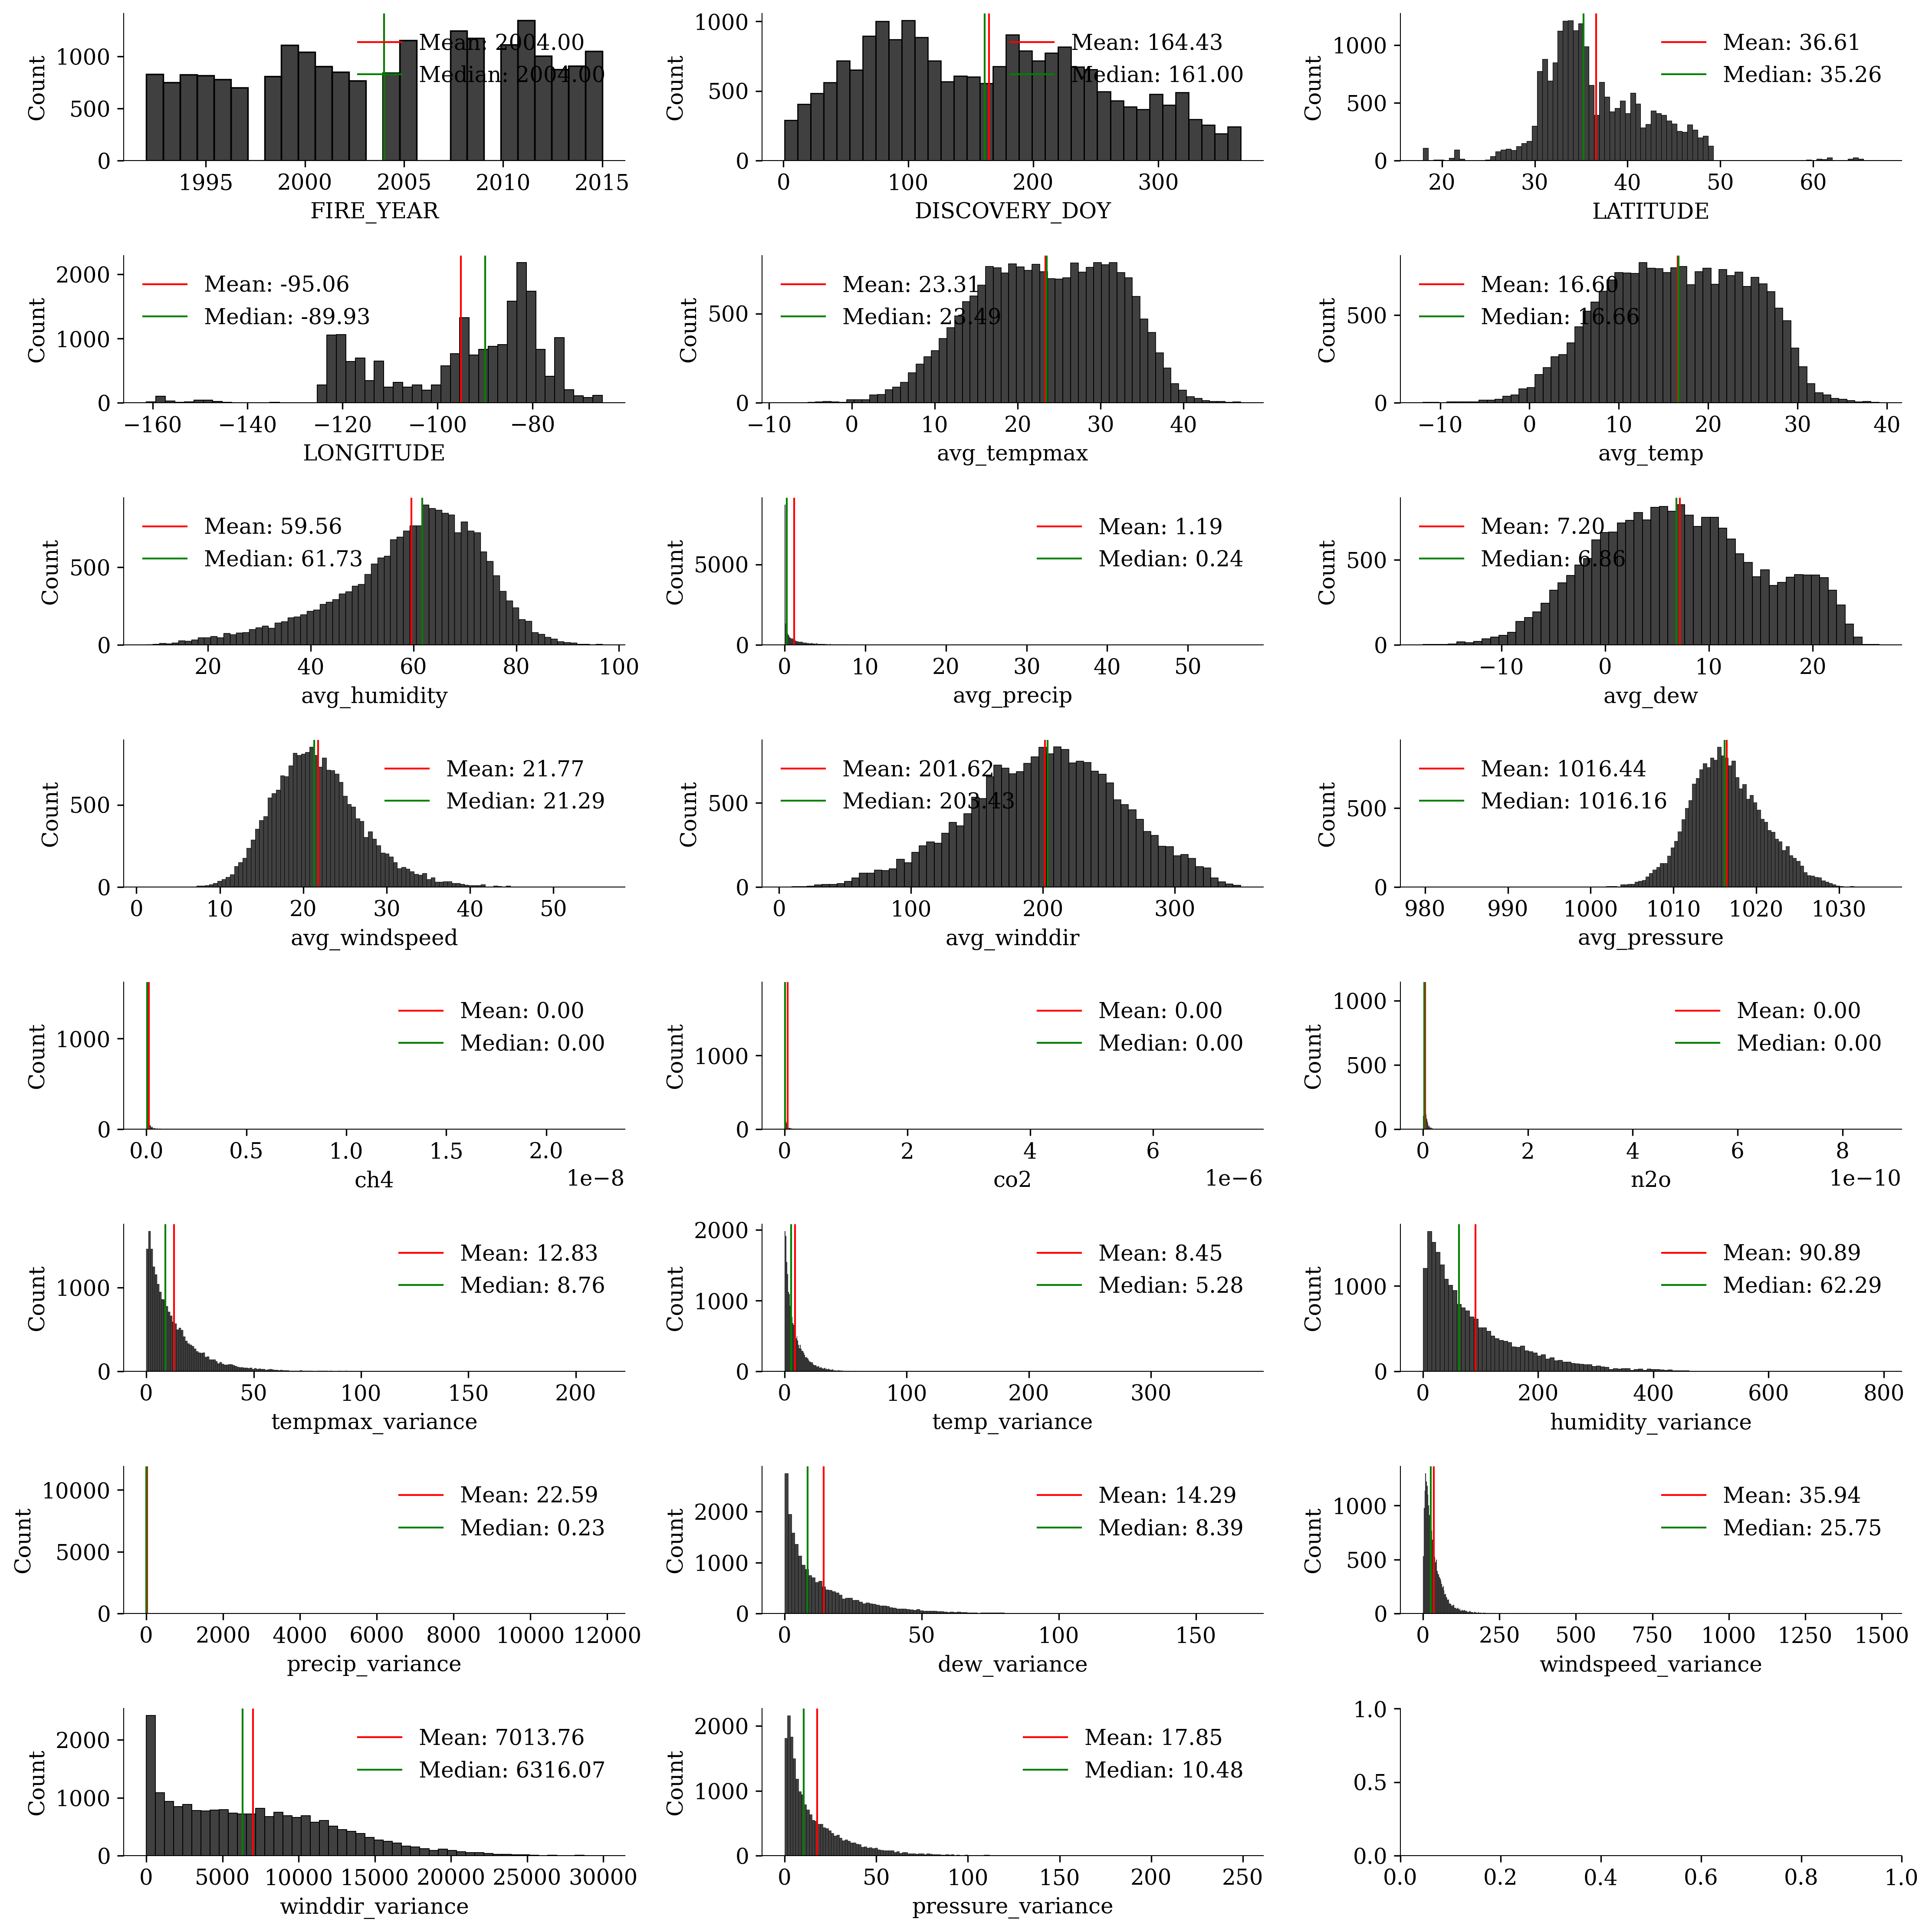

In [75]:
utils.HistogramSubplots(numeric_df.drop('FIRE_SIZE', axis=1))

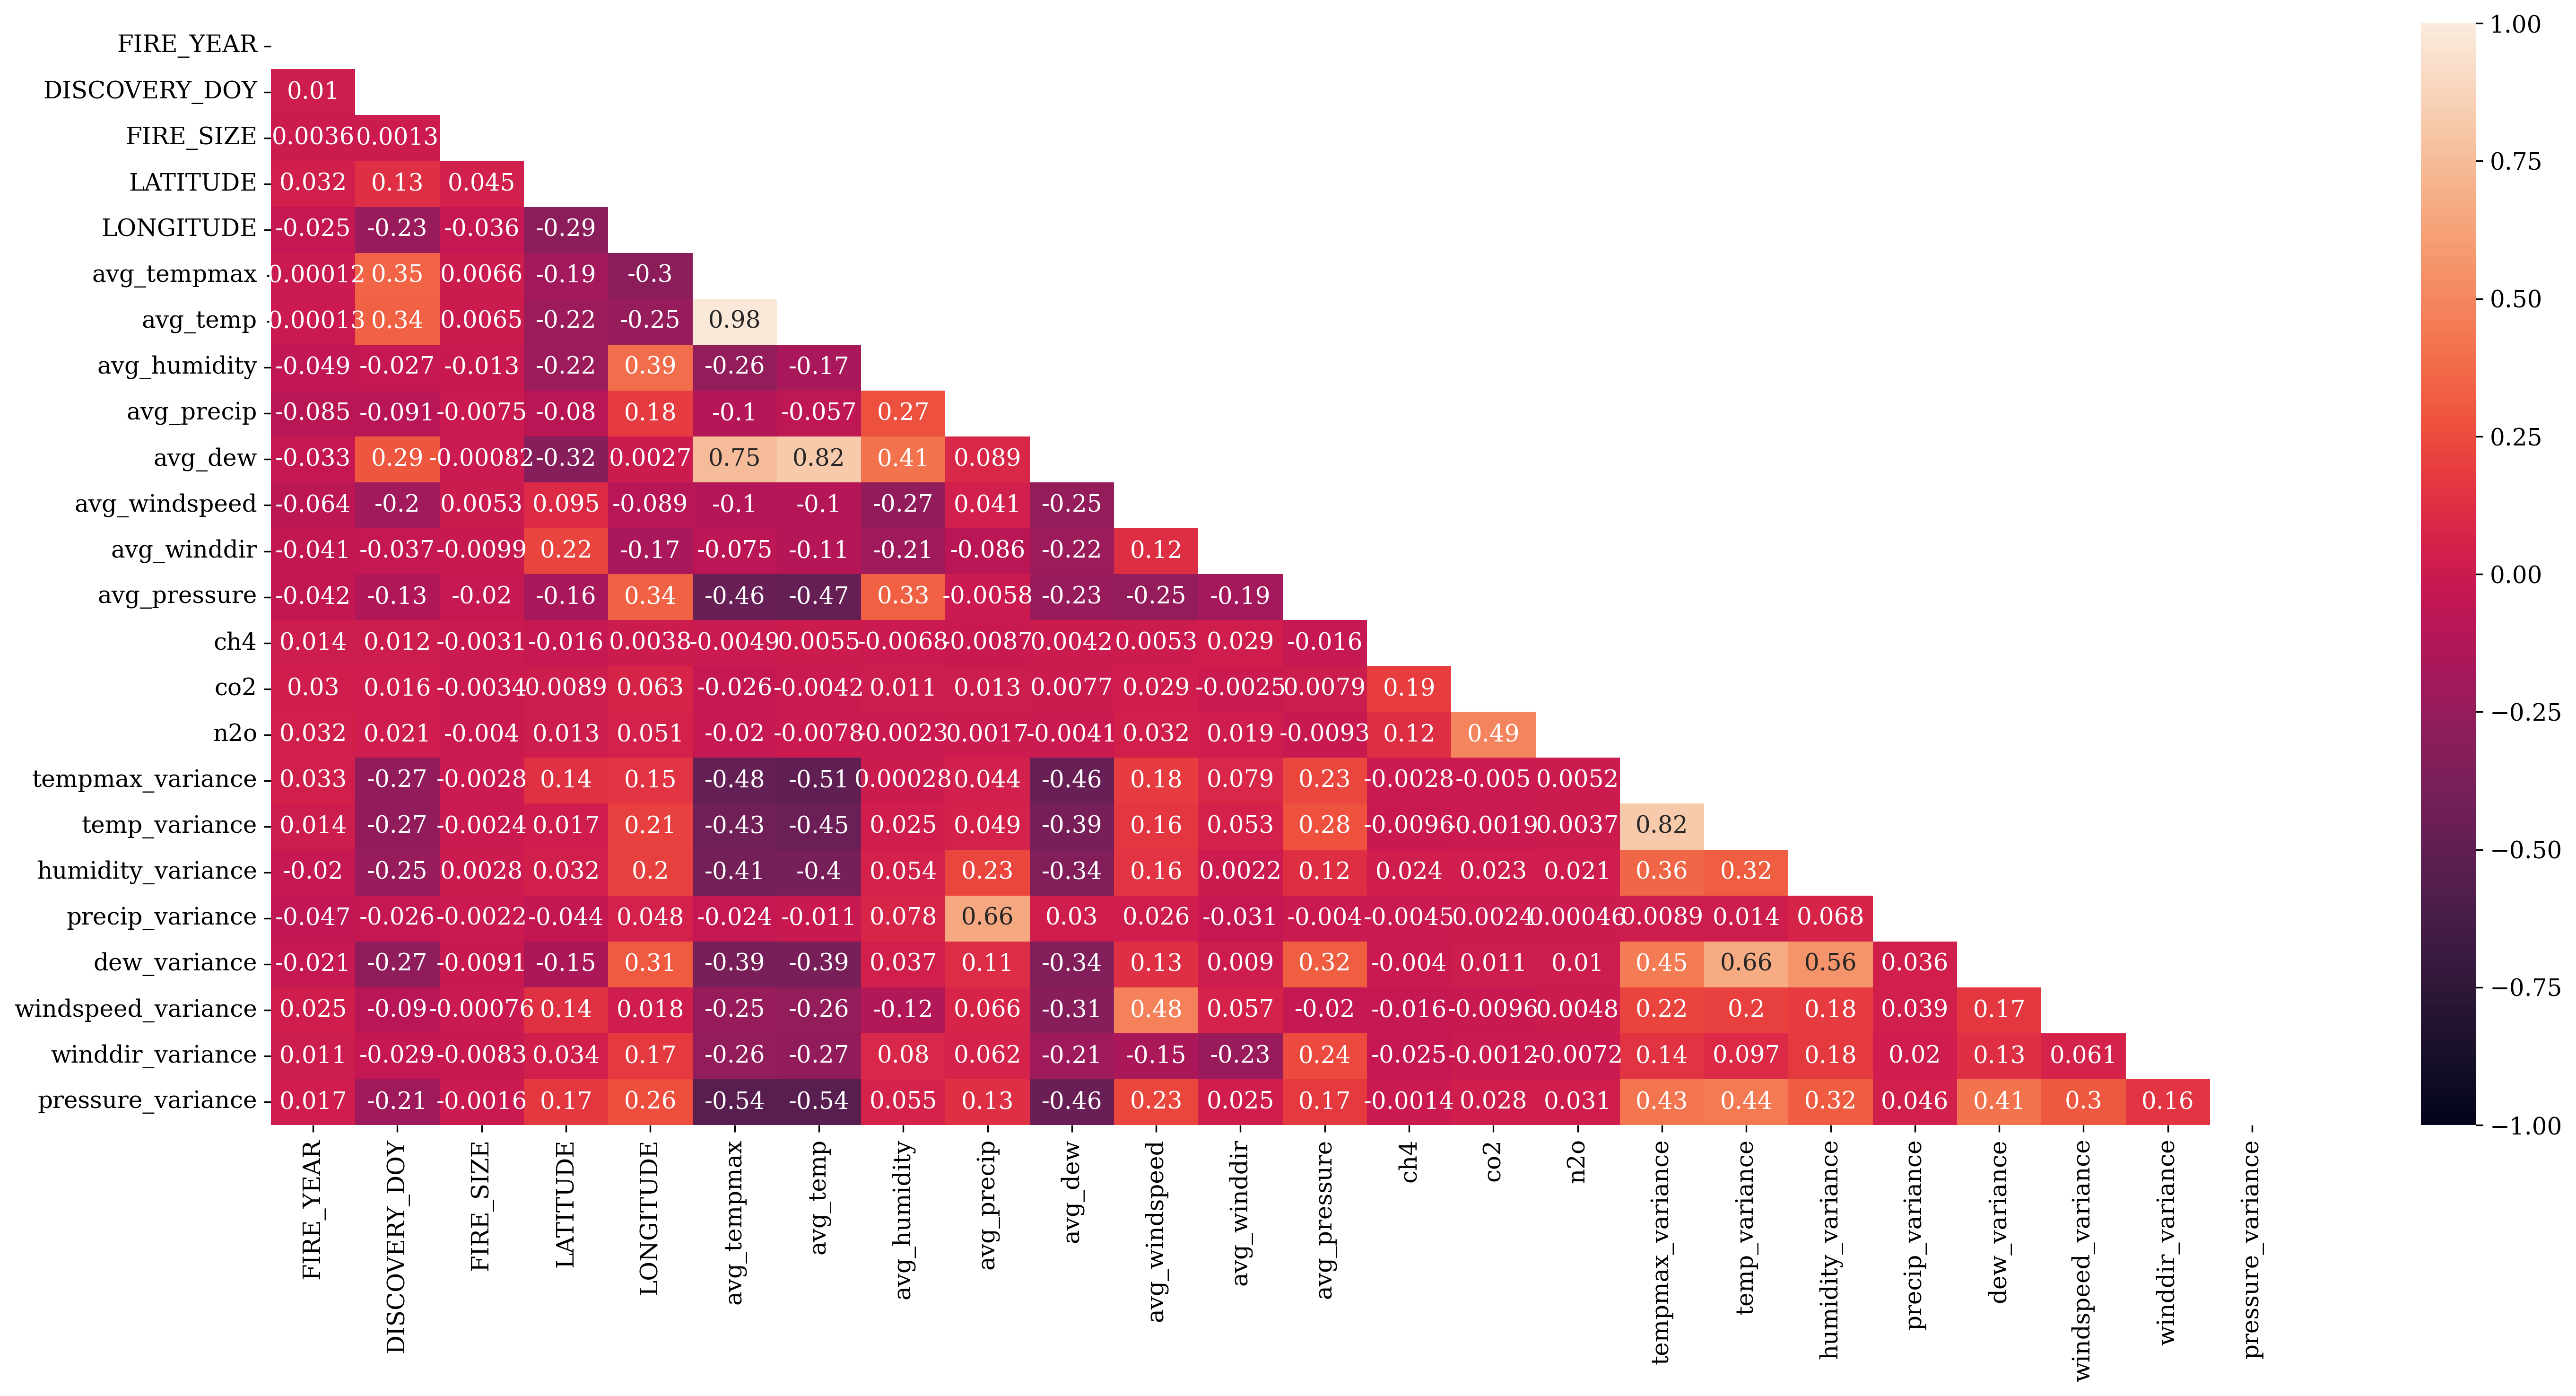

In [78]:
# Plot the correlation using a heatmap
corr = numeric_df.corr()

plt.figure(figsize=(20,10), dpi=300)
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, vmin=-1, vmax=1)
plt.show()

As we can see, initially, there is very little correlation between the values in our data set. Presumably this is because the scale of the fire data, which is heavily skewed.

## Exploring relationships between variables

On the basis of the previous exploration, can any be used to predict the others? To figure this out, it helps to begin by plotting variables against each other, to visualize the relationship between them.

In [79]:
X_input = numeric_df.drop('FIRE_SIZE', axis=1)
X_input.head()

FIRE_YEAR  DISCOVERY_DOY   LATITUDE   LONGITUDE  avg_tempmax   avg_temp  \
0       1992              1  43.325000 -101.018500     5.257143  -2.928571   
2       1992              1  33.058333  -79.979167    13.700000   9.885714   
3       1992              2  40.775000  -74.854160     6.385714   1.585714   
5       1992              3  31.018500  -83.297300    14.457143  11.828571   
6       1992              3  30.728900  -87.238100    14.428571  10.985714   

   avg_humidity  avg_precip   avg_dew  avg_windspeed  avg_winddir  \
0     81.142857    0.000000 -6.071429      18.371429   223.500000   
2     81.428571    4.185714  6.671429      23.514286   112.142857   
3     67.185714    1.394286 -4.242857      18.157143   133.342857   
5     78.957143    4.685714  8.128571      19.200000   160.728571   
6     79.971429    0.188571  7.500000      17.000000   216.628571   

   avg_pressure           ch4           co2           n2o  tempmax_variance  \
0   1021.671429  4.613353e-11  3.672947e-09  3.926278e-12          6.265306   
2   1023.357143  1.795242e-11  8.400253e-07  1.743553e-11          4.182857   
3   1027.400000  3.996876e-11  2.849724e-08  4.053962e-12          3.741224   
5   1019.242857  4.614540e-11  7.060710e-09  2.618501e-12          4.645306   
6   1019.671429  9.516179e-12  3.579336e-09  1.213336e-12          2.844898   

   temp_variance  humidity_variance  precip_variance  dew_variance  \
0       3.030612          24.548163         0.000000      5.399184   
2       0.752653         111.222041        55.589796      7.196327   
3       6.858367          90.024082         9.546510     19.731020   
5       4.124898          47.791020        59.321224      9.142041   
6       5.009796          41.290612         0.213355     10.262857   

   windspeed_variance  winddir_variance  pressure_variance  
0           47.062041       1889.074286          28.913469  
2            5.575510      15648.559592          19.071020  
3           34.516735      16492.948163          75.711429  
5           11.228571      16679.204898          21.585306  
6           27.382857      19587.093469          13.107755

In [80]:
# Check the list of possible predictive column names
plt.subplots(6, 4, figsize=(30,30), dpi=300)

for index, col in enumerate(X_input):
    position = index + 1
    plt.subplot(6, 4, position)
    sns.histplot(x=X_input[col], 
                 y=df_cleaned['FIRE_SIZE_CLASS'],
                 kde=True)

plt.tight_layout()
plt.show()

### Combining the DataFrames

In [81]:
# df_processed = pd.concat([numeric_df, categorical_df.iloc[:,8:]], axis=1)

In [82]:
# df_processed.head()

## Baseline Linear Regression

In order to build this model there are a few things that we have to do before hand. First, we need to format the data - this includes transformations on skewed data using Boxcox.

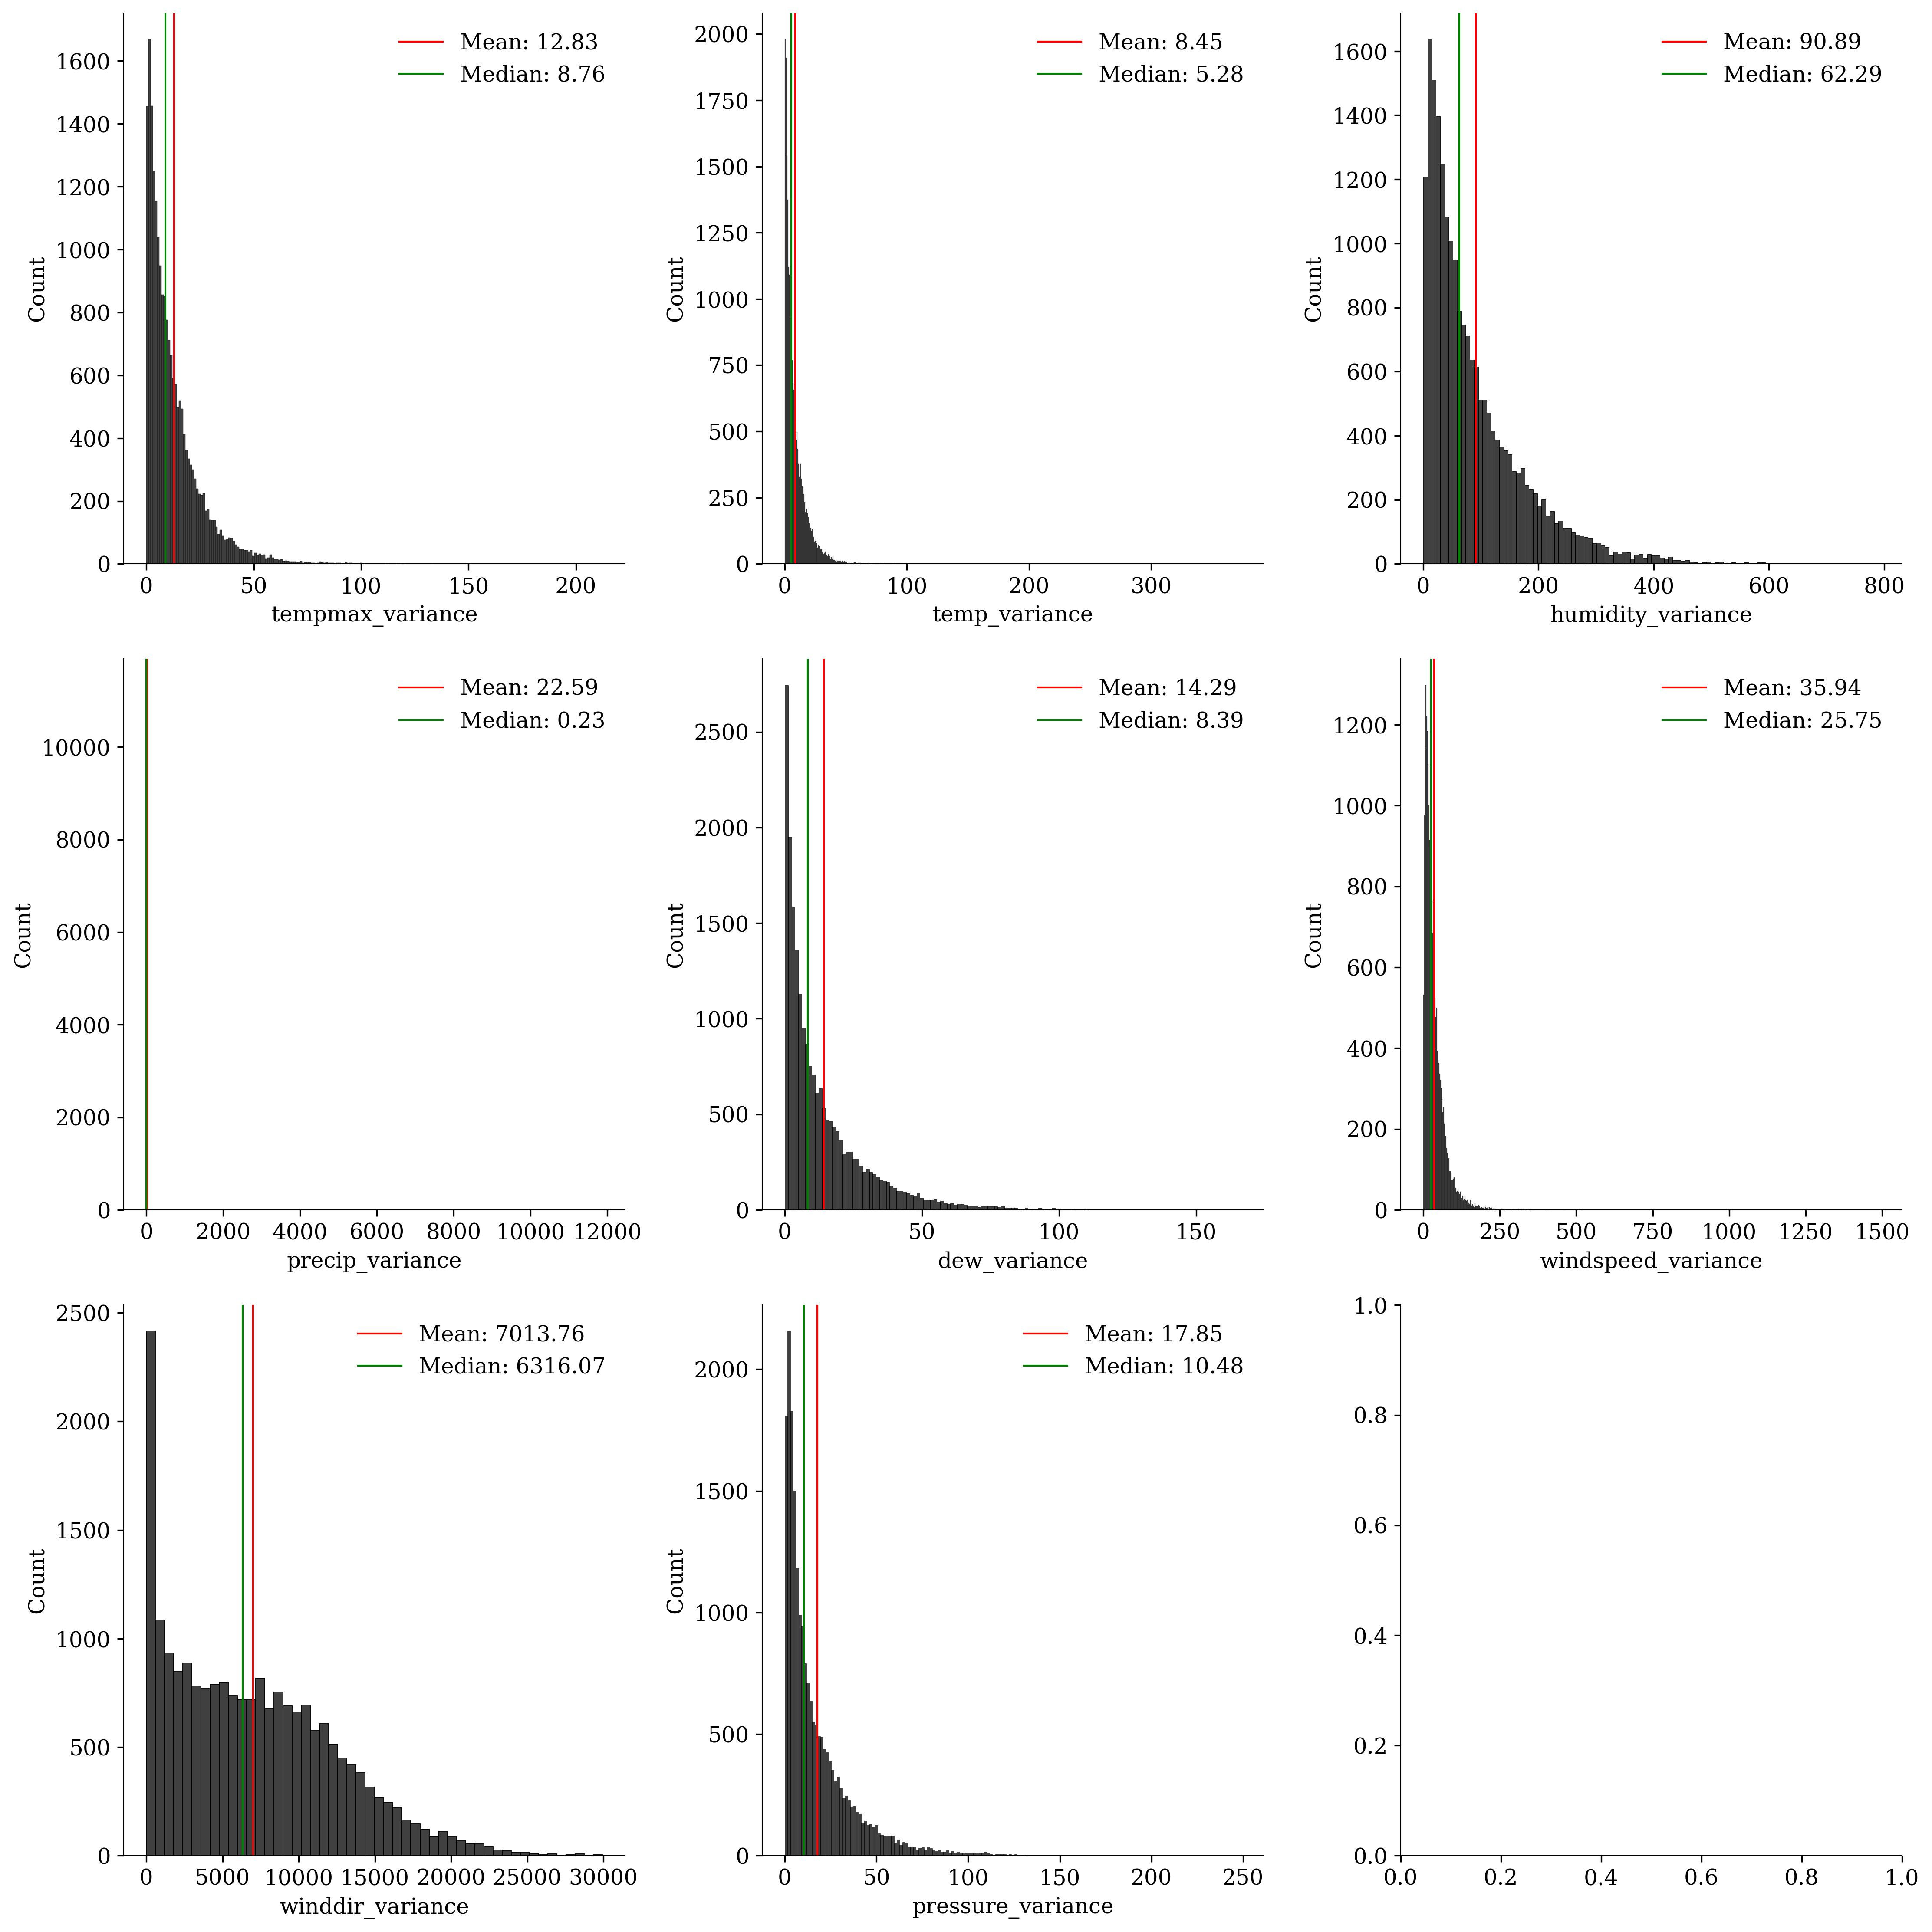

In [83]:
boxcox_cols = [col for col in numeric_df.columns
               if 'variance' in col]

utils.HistogramSubplots(numeric_df[boxcox_cols])

For our linear regression model we require the columns to be normal - these are heavily right skewed, meaning they do not conform to our assumptions of a linear regression. We can transform these columns using a Box-cox transformation to see whether we are able to normalise their distribution. To do Box-Cox, the variables need to be greater than 0. Let us look at the variables and see whether they fall within the range:

In [85]:
numeric_df[boxcox_cols].describe().T

count         mean          std       min          25%  \
tempmax_variance    20851.0    12.828399    13.465794  0.001224     3.499184   
temp_variance       20851.0     8.447304     9.943393  0.012653     1.989796   
humidity_variance   20851.0    90.893124    88.044584  0.187755    26.417959   
precip_variance     20851.0    22.594312   176.365582  0.000000     0.000000   
dew_variance        20851.0    14.291504    16.451731  0.016735     2.851429   
windspeed_variance  20851.0    35.944840    37.009957  0.291020    12.849592   
winddir_variance    20851.0  7013.763855  5415.470092  0.757143  2344.036327   
pressure_variance   20851.0    17.848506    20.582998  0.033878     3.977551   

                            50%           75%           max  
tempmax_variance       8.756327     17.403673    212.282449  
temp_variance          5.276327     11.563265    373.487755  
humidity_variance     62.291020    128.072857    791.417143  
precip_variance        0.225441      6.803071  11870.070612  
dew_variance           8.393469     19.834898    166.250612  
windspeed_variance    25.747755     47.240612   1490.442449  
winddir_variance    6316.071020  10643.864694  29931.213469  
pressure_variance     10.481224     24.478776    248.764082

We see that the minimum value for precipitation is 0, meaning that we need to remove this from the transformations. Before we change it in the`processed_df`, we should see how the transformation works out.

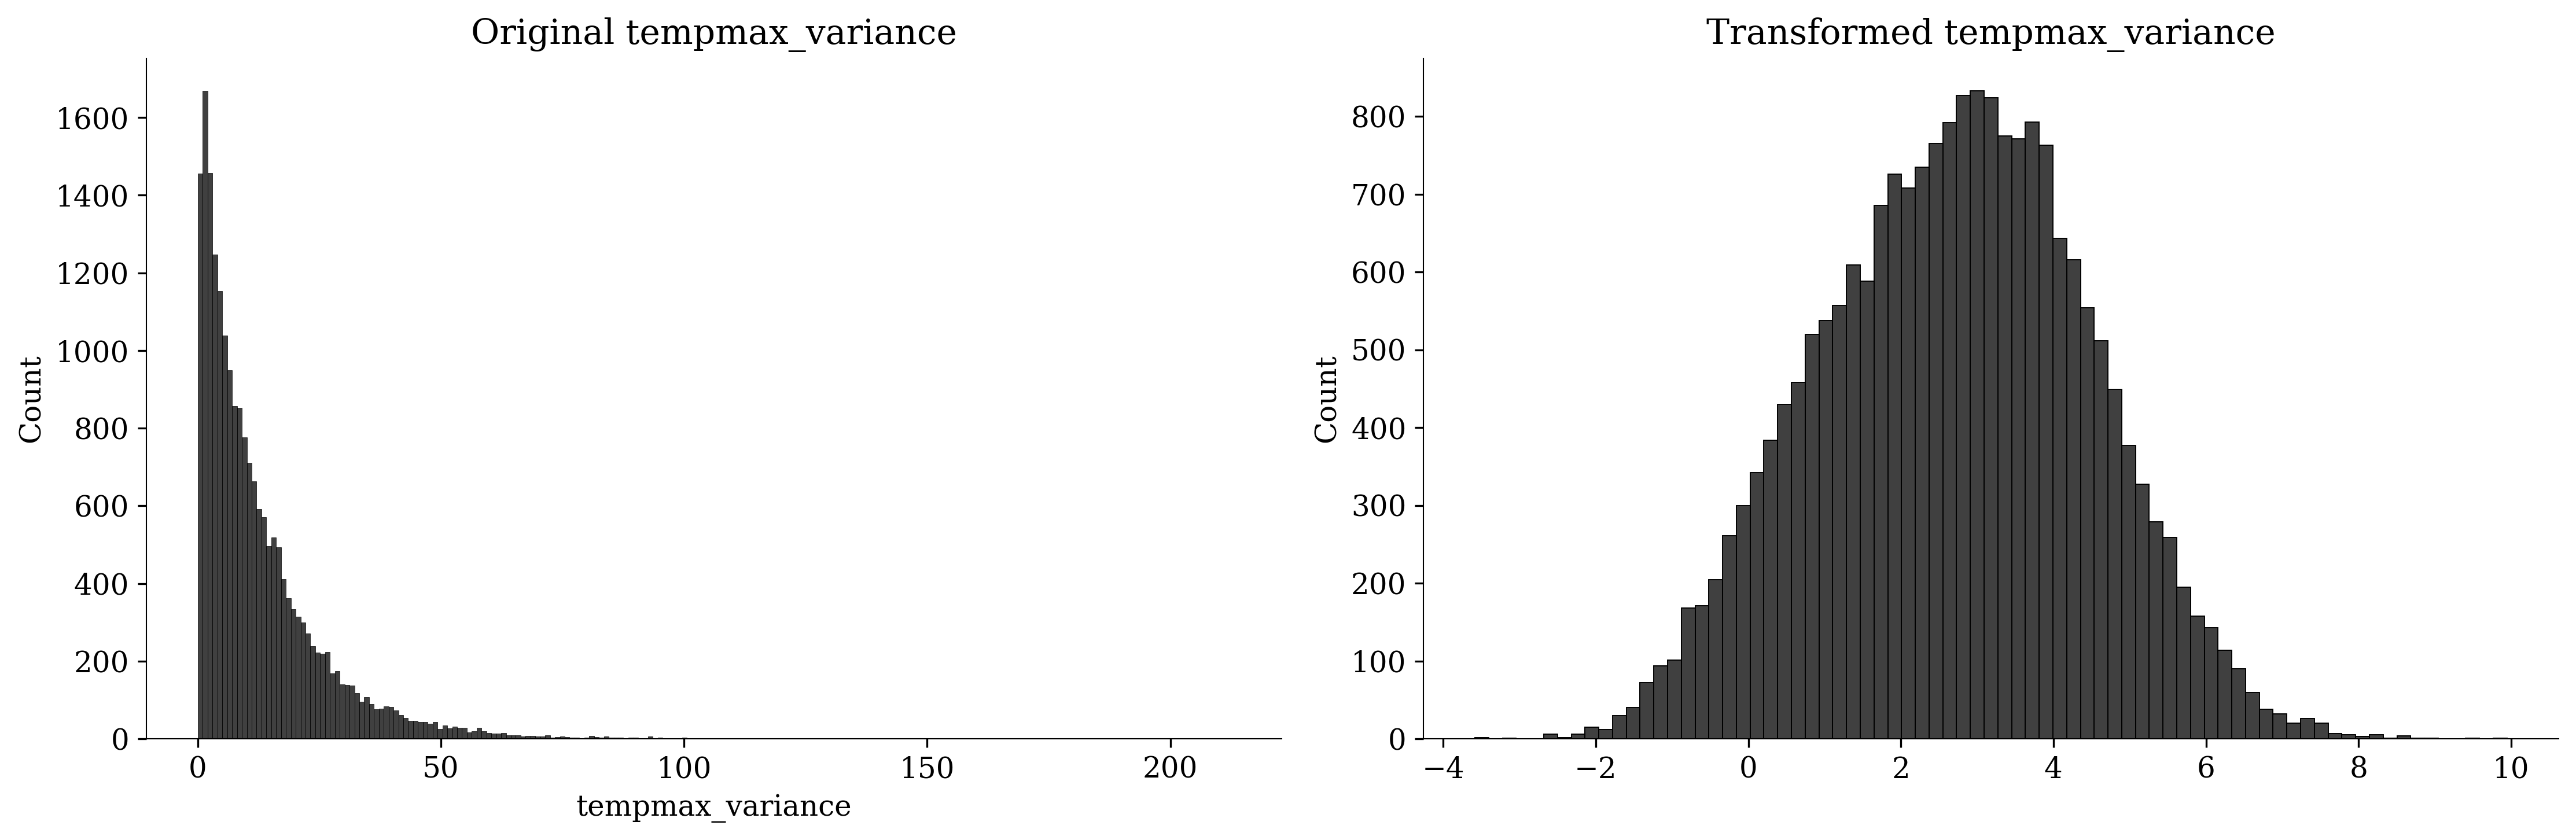

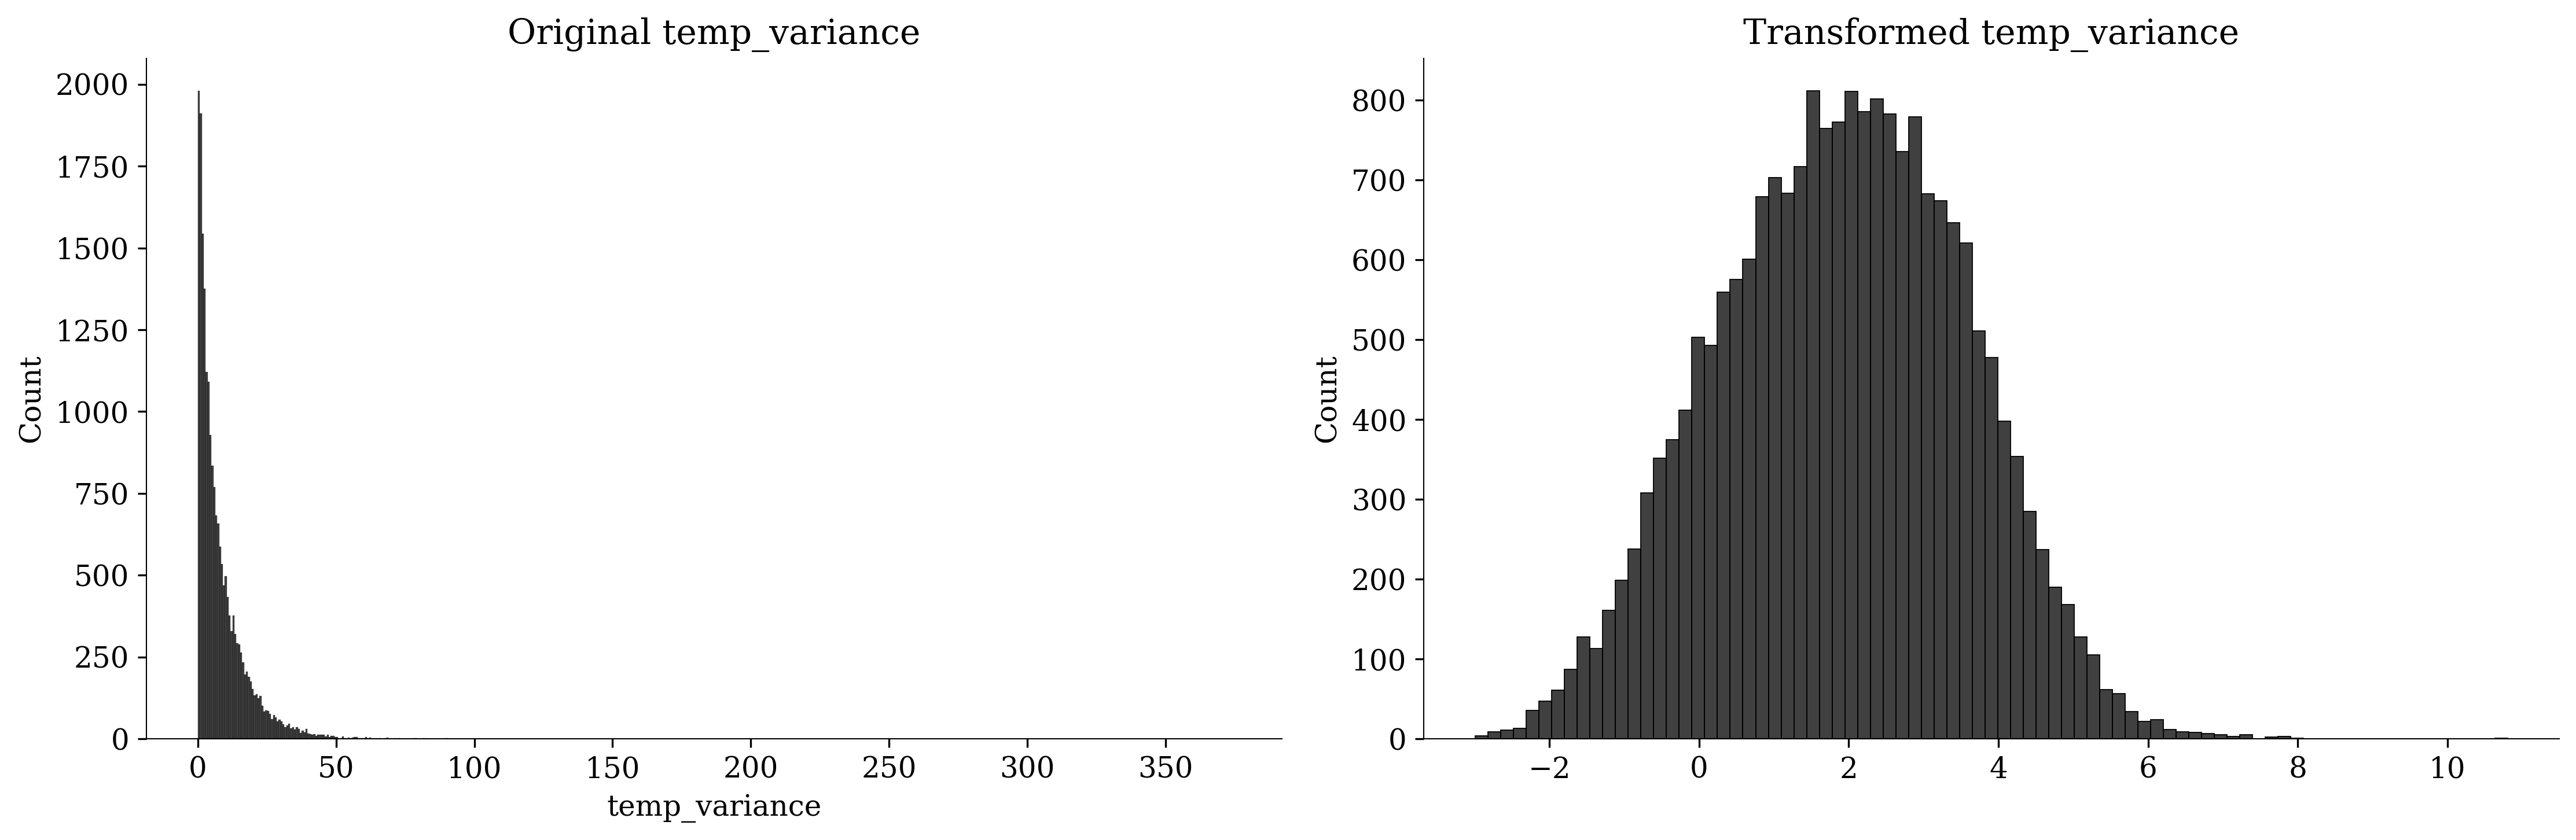

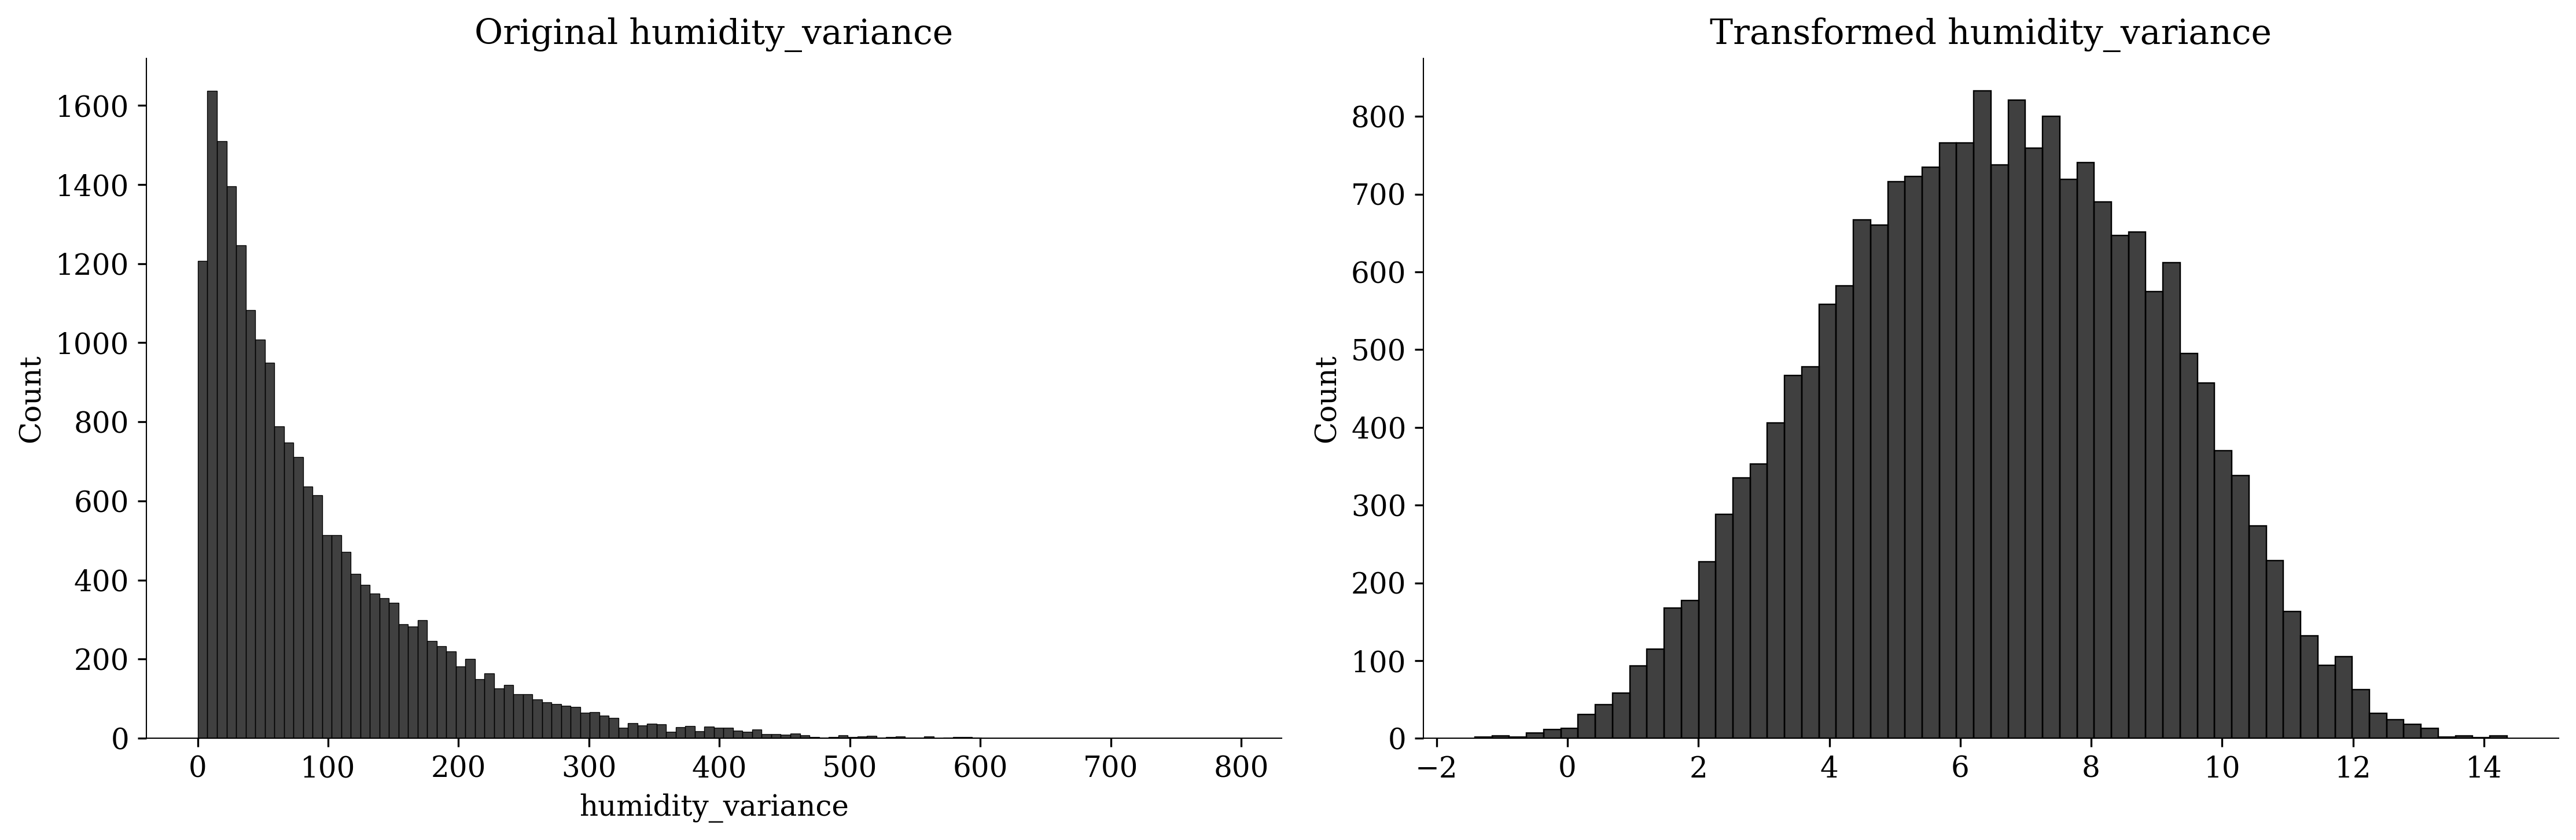

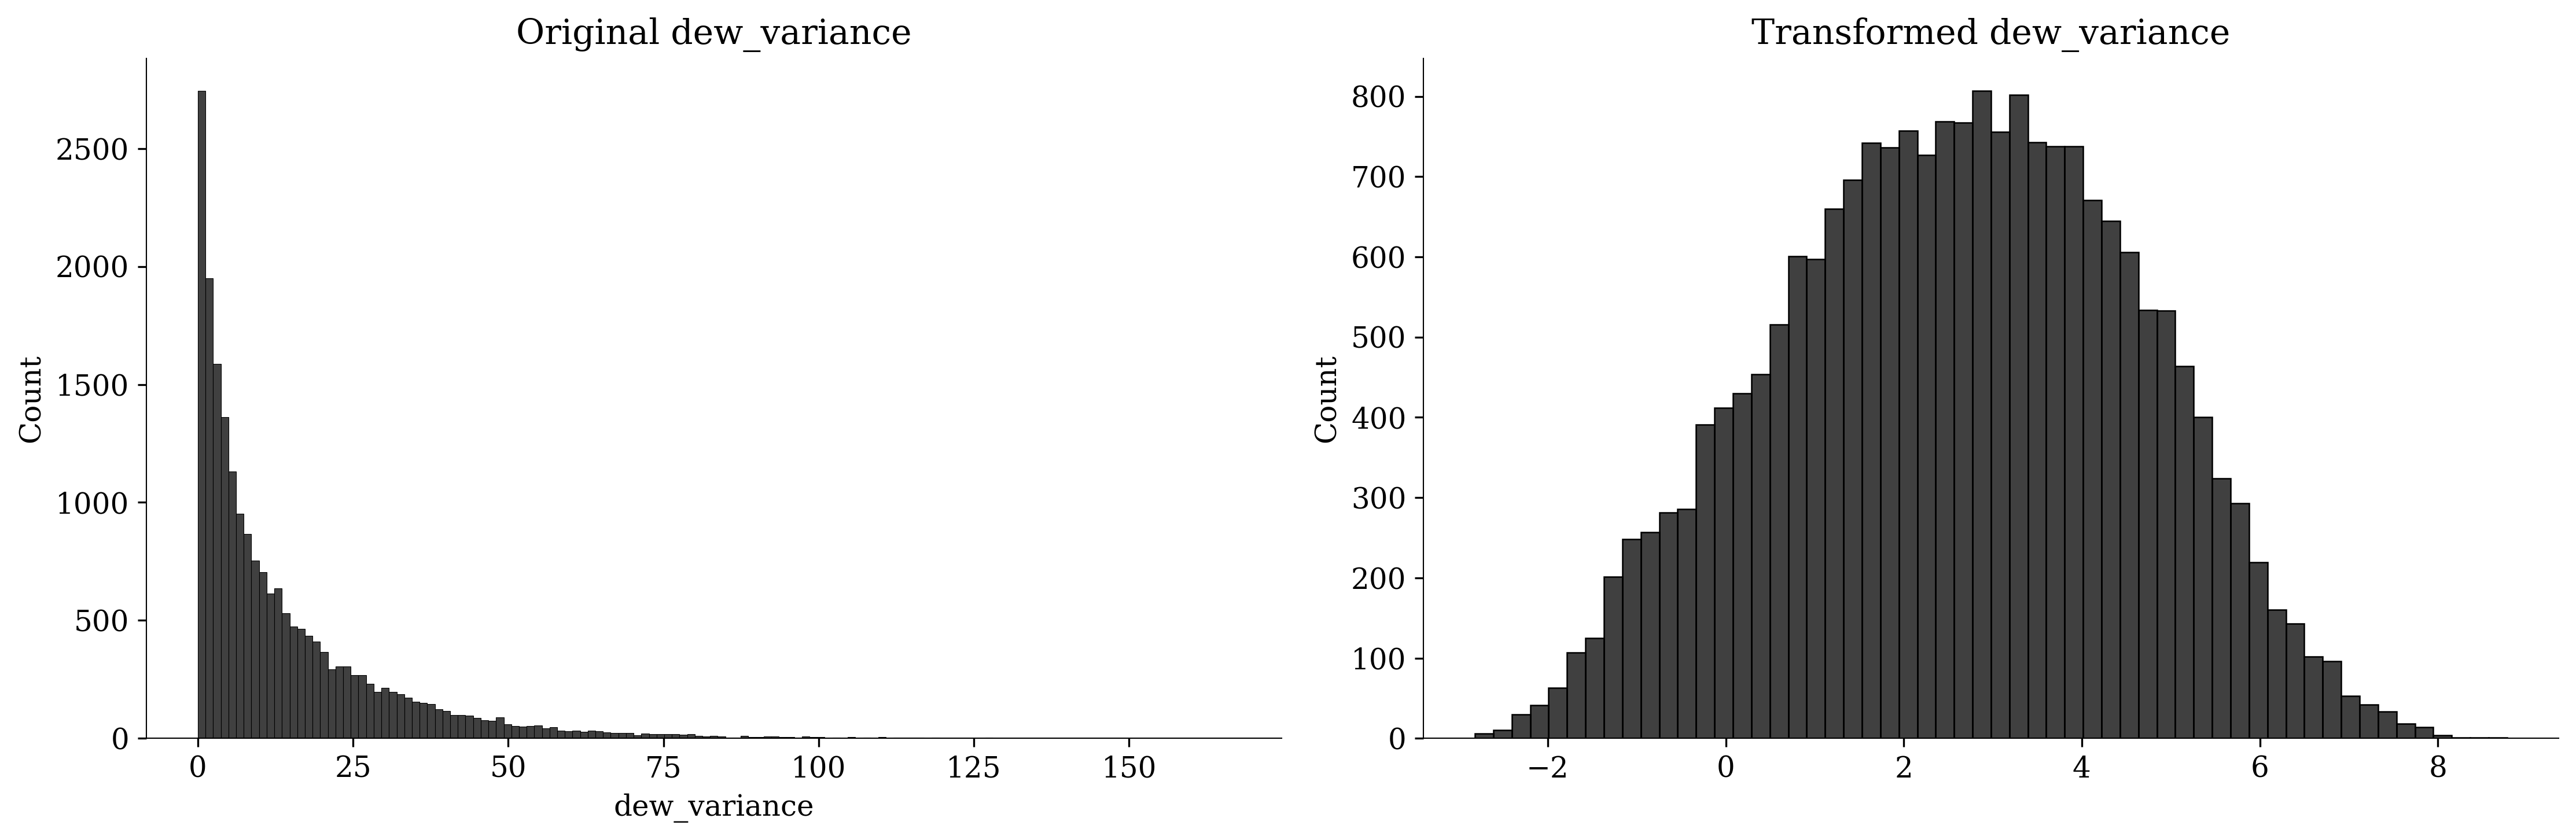

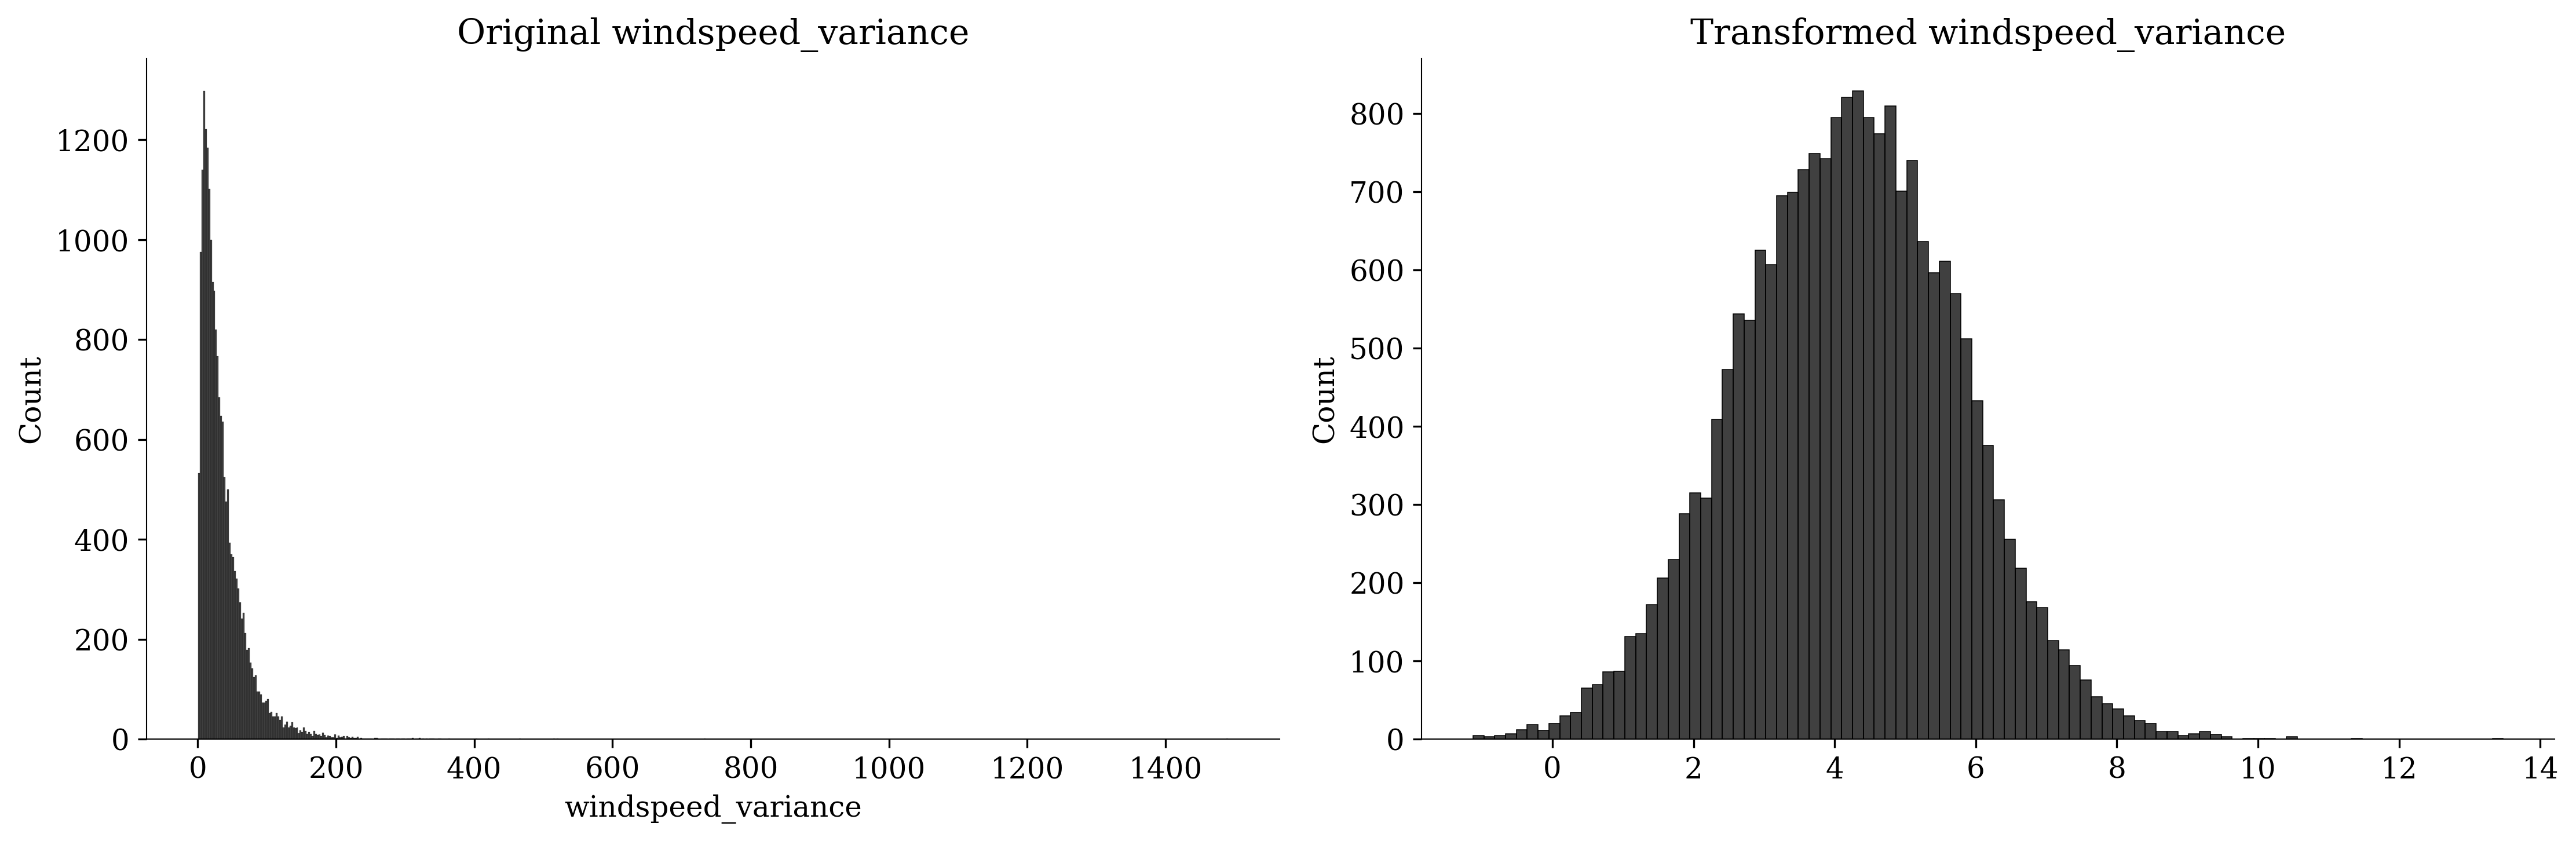

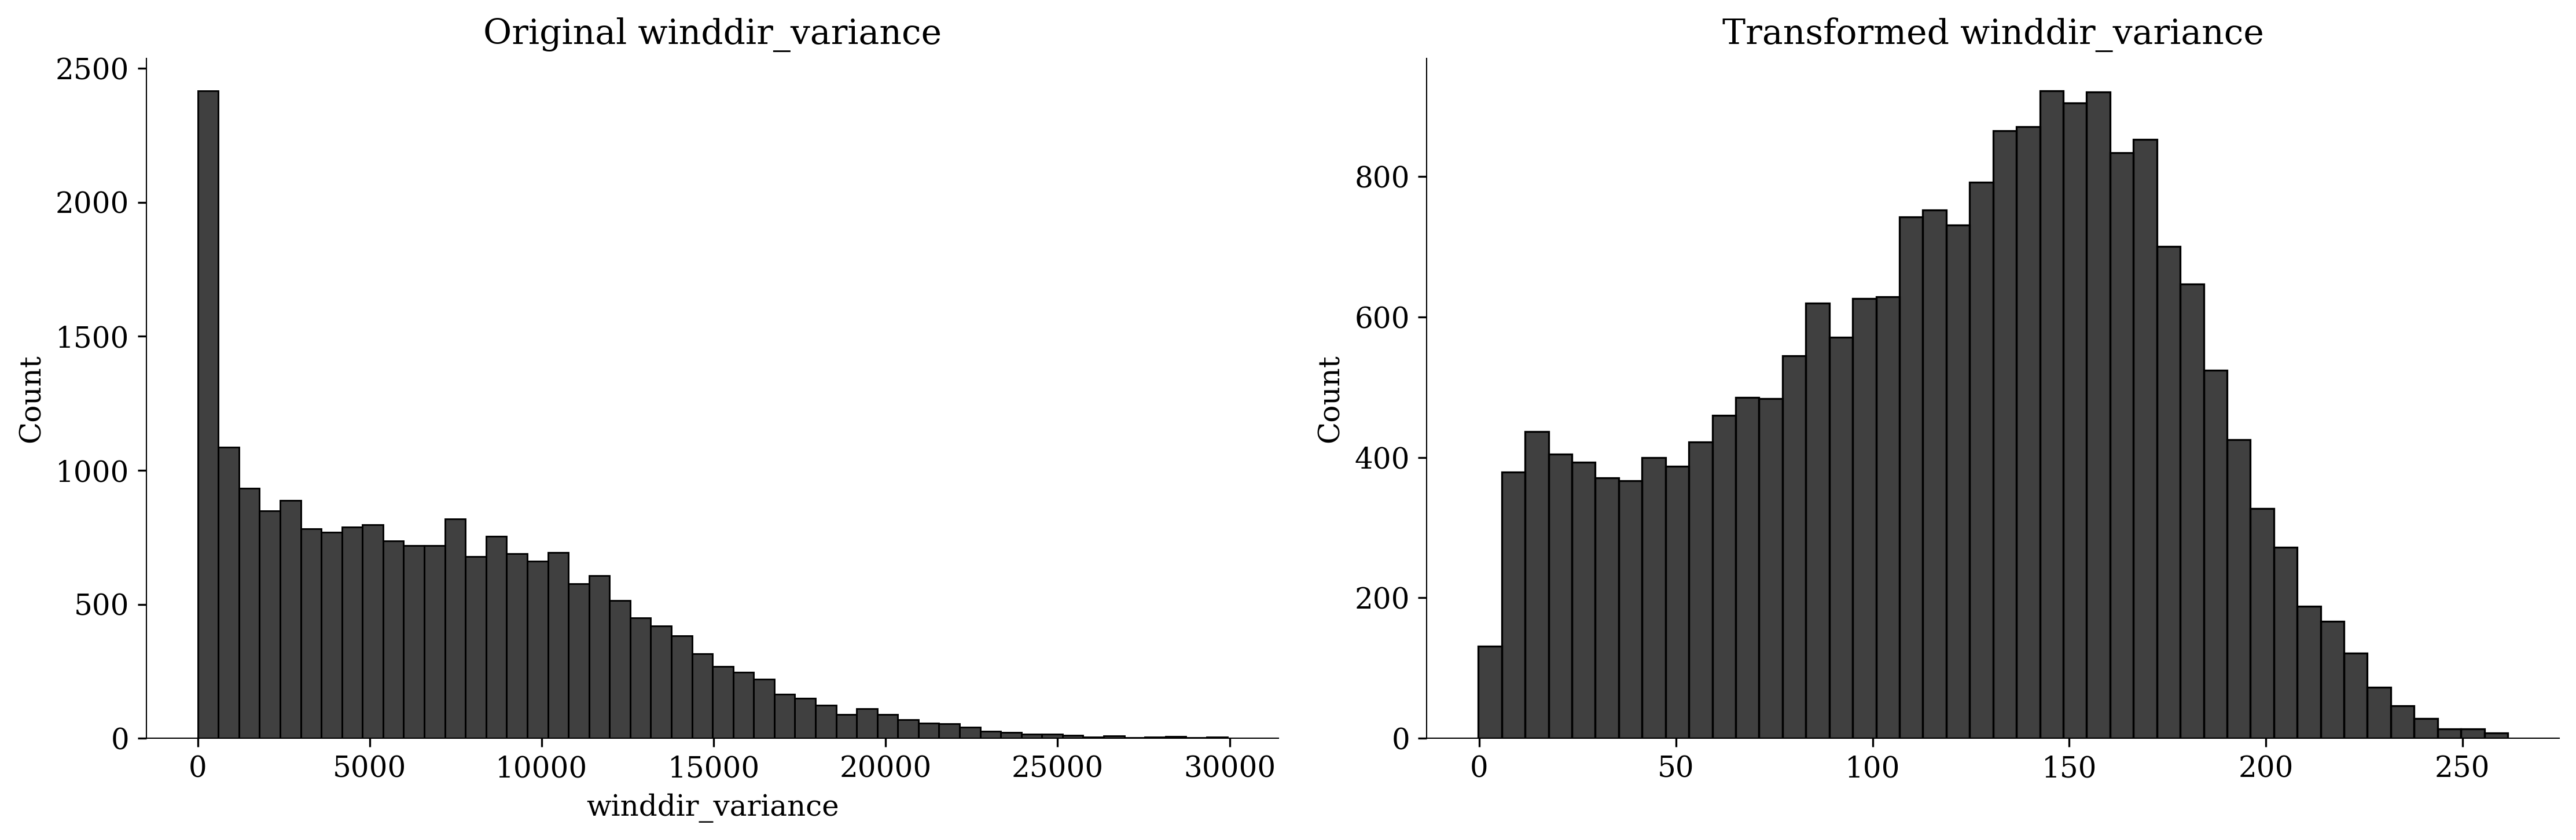

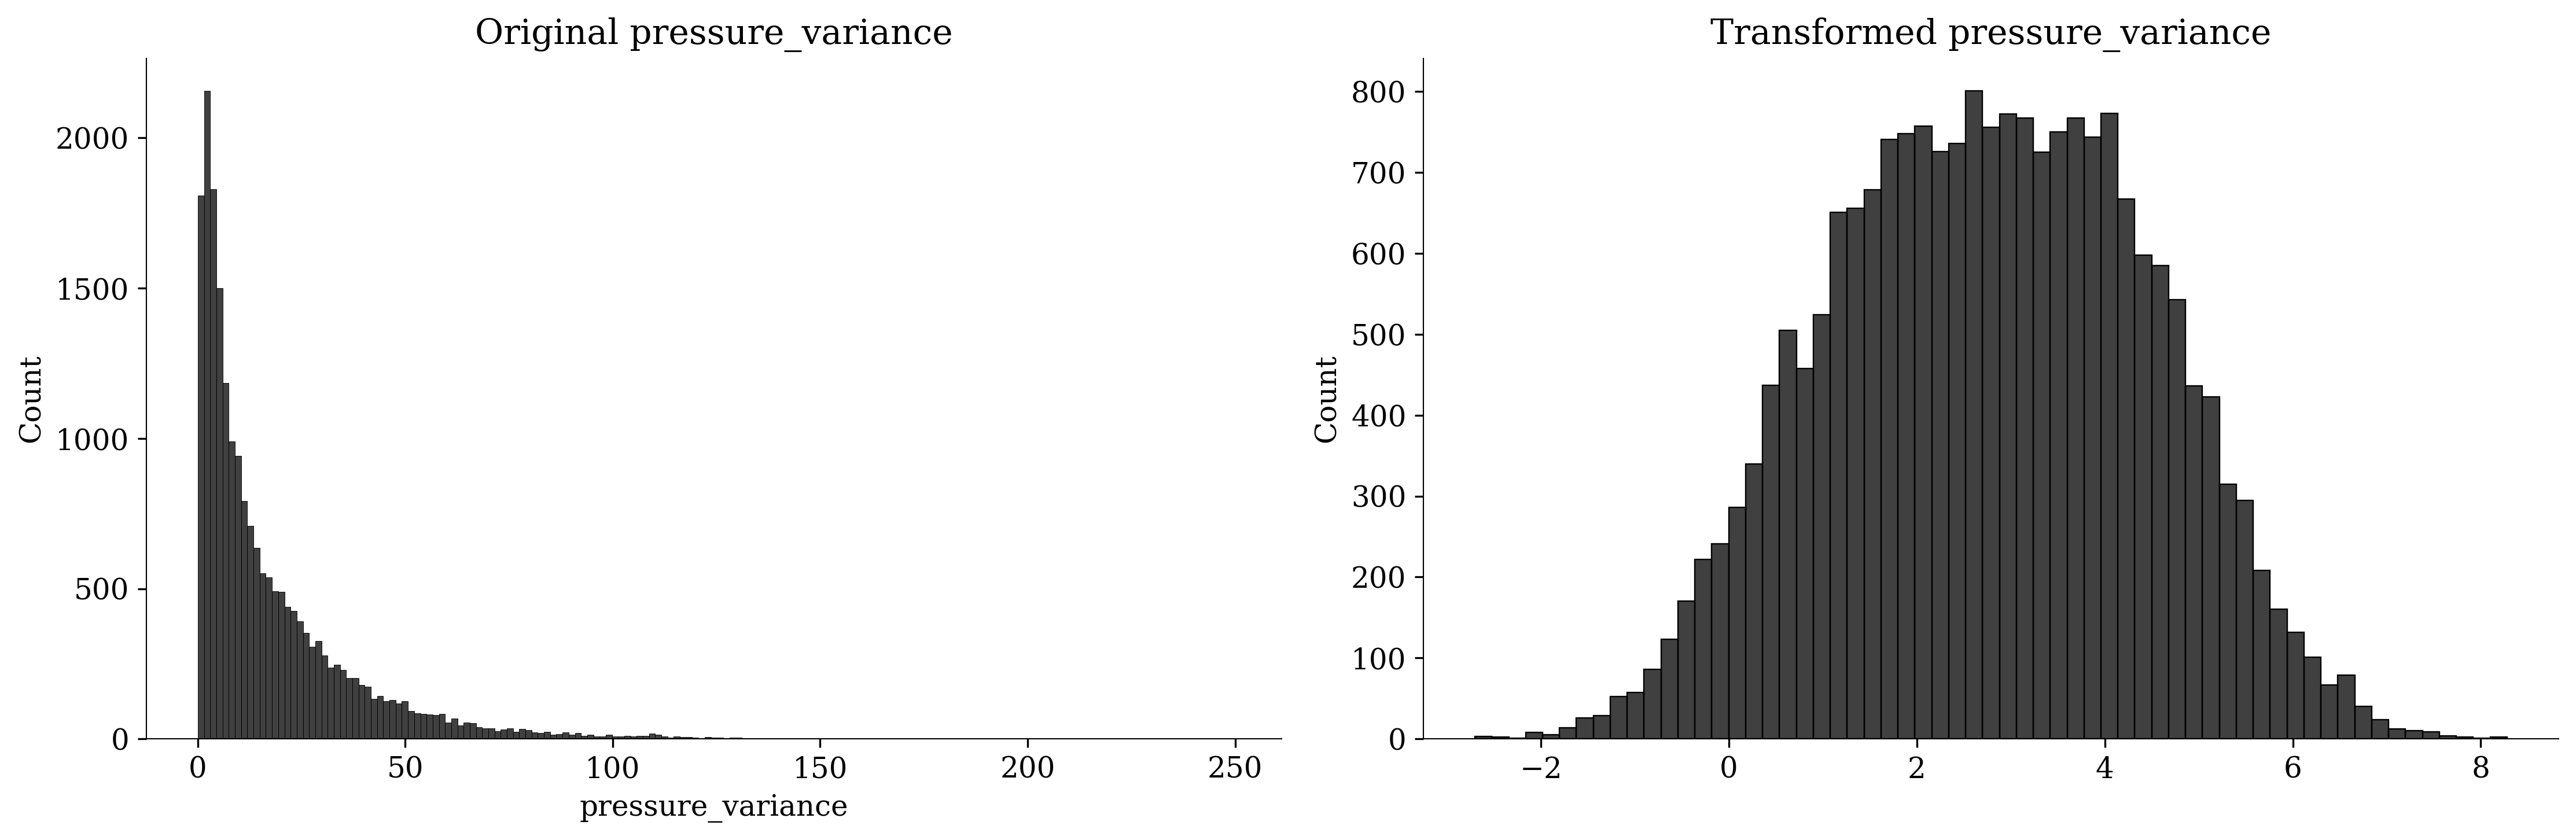

In [86]:
from scipy.stats import boxcox

boxcox_cols.remove('precip_variance')

tmp = numeric_df.copy()

for col in boxcox_cols:
    X = numeric_df[col]
    X = boxcox(X)[0]
    
    # Create subplots
    plt.subplots(1, 2, dpi=300, figsize=(15, 5))
    
    # Plot original
    plt.subplot(1, 2, 1)
    plt.title(f'Original {col}')
    sns.histplot(x=numeric_df[col])
    
    plt.subplot(1, 2, 2)
    plt.title(f'Transformed {col}')
    sns.histplot(x=X)

These are good transformations, we can now change them on the `df_processed`.

In [87]:
for col in boxcox_cols:
    name = f'boxcox_{col}'
    numeric_df[name] = boxcox(numeric_df[col])[0]

In [88]:
numeric_df.head()

FIRE_YEAR  DISCOVERY_DOY  FIRE_SIZE   LATITUDE   LONGITUDE  avg_tempmax  \
0       1992              1       0.10  43.325000 -101.018500     5.257143   
2       1992              1       1.00  33.058333  -79.979167    13.700000   
3       1992              2       0.25  40.775000  -74.854160     6.385714   
5       1992              3       1.91  31.018500  -83.297300    14.457143   
6       1992              3       2.00  30.728900  -87.238100    14.428571   

    avg_temp  avg_humidity  avg_precip   avg_dew  avg_windspeed  avg_winddir  \
0  -2.928571     81.142857    0.000000 -6.071429      18.371429   223.500000   
2   9.885714     81.428571    4.185714  6.671429      23.514286   112.142857   
3   1.585714     67.185714    1.394286 -4.242857      18.157143   133.342857   
5  11.828571     78.957143    4.685714  8.128571      19.200000   160.728571   
6  10.985714     79.971429    0.188571  7.500000      17.000000   216.628571   

   avg_pressure           ch4           co2           n2o  tempmax_variance  \
0   1021.671429  4.613353e-11  3.672947e-09  3.926278e-12          6.265306   
2   1023.357143  1.795242e-11  8.400253e-07  1.743553e-11          4.182857   
3   1027.400000  3.996876e-11  2.849724e-08  4.053962e-12          3.741224   
5   1019.242857  4.614540e-11  7.060710e-09  2.618501e-12          4.645306   
6   1019.671429  9.516179e-12  3.579336e-09  1.213336e-12          2.844898   

   temp_variance  humidity_variance  precip_variance  dew_variance  \
0       3.030612          24.548163         0.000000      5.399184   
2       0.752653         111.222041        55.589796      7.196327   
3       6.858367          90.024082         9.546510     19.731020   
5       4.124898          47.791020        59.321224      9.142041   
6       5.009796          41.290612         0.213355     10.262857   

   windspeed_variance  winddir_variance  pressure_variance  \
0           47.062041       1889.074286          28.913469   
2            5.575510      15648.559592          19.071020   
3           34.516735      16492.948163          75.711429   
5           11.228571      16679.204898          21.585306   
6           27.382857      19587.093469          13.107755   

   boxcox_tempmax_variance  boxcox_temp_variance  boxcox_humidity_variance  \
0                 2.241465              1.231418                  4.533243   
2                 1.670824             -0.276770                  7.963132   
3                 1.521625              2.315524                  7.416465   
5                 1.814281              1.621402                  5.914945   
6                 1.169975              1.879018                  5.595259   

   boxcox_dew_variance  boxcox_windspeed_variance  boxcox_winddir_variance  \
0             1.996879                   5.249817                70.421101   
2             2.407602                   1.966009               192.632581   
3             4.046228                   4.703349               197.472098   
5             2.767724                   2.927803               198.521705   
6             2.947874                   4.311854               214.161435   

   boxcox_pressure_variance  
0                  4.284964  
2                  3.640714  
3                  5.925481  
5                  3.828579  
6                  3.091151

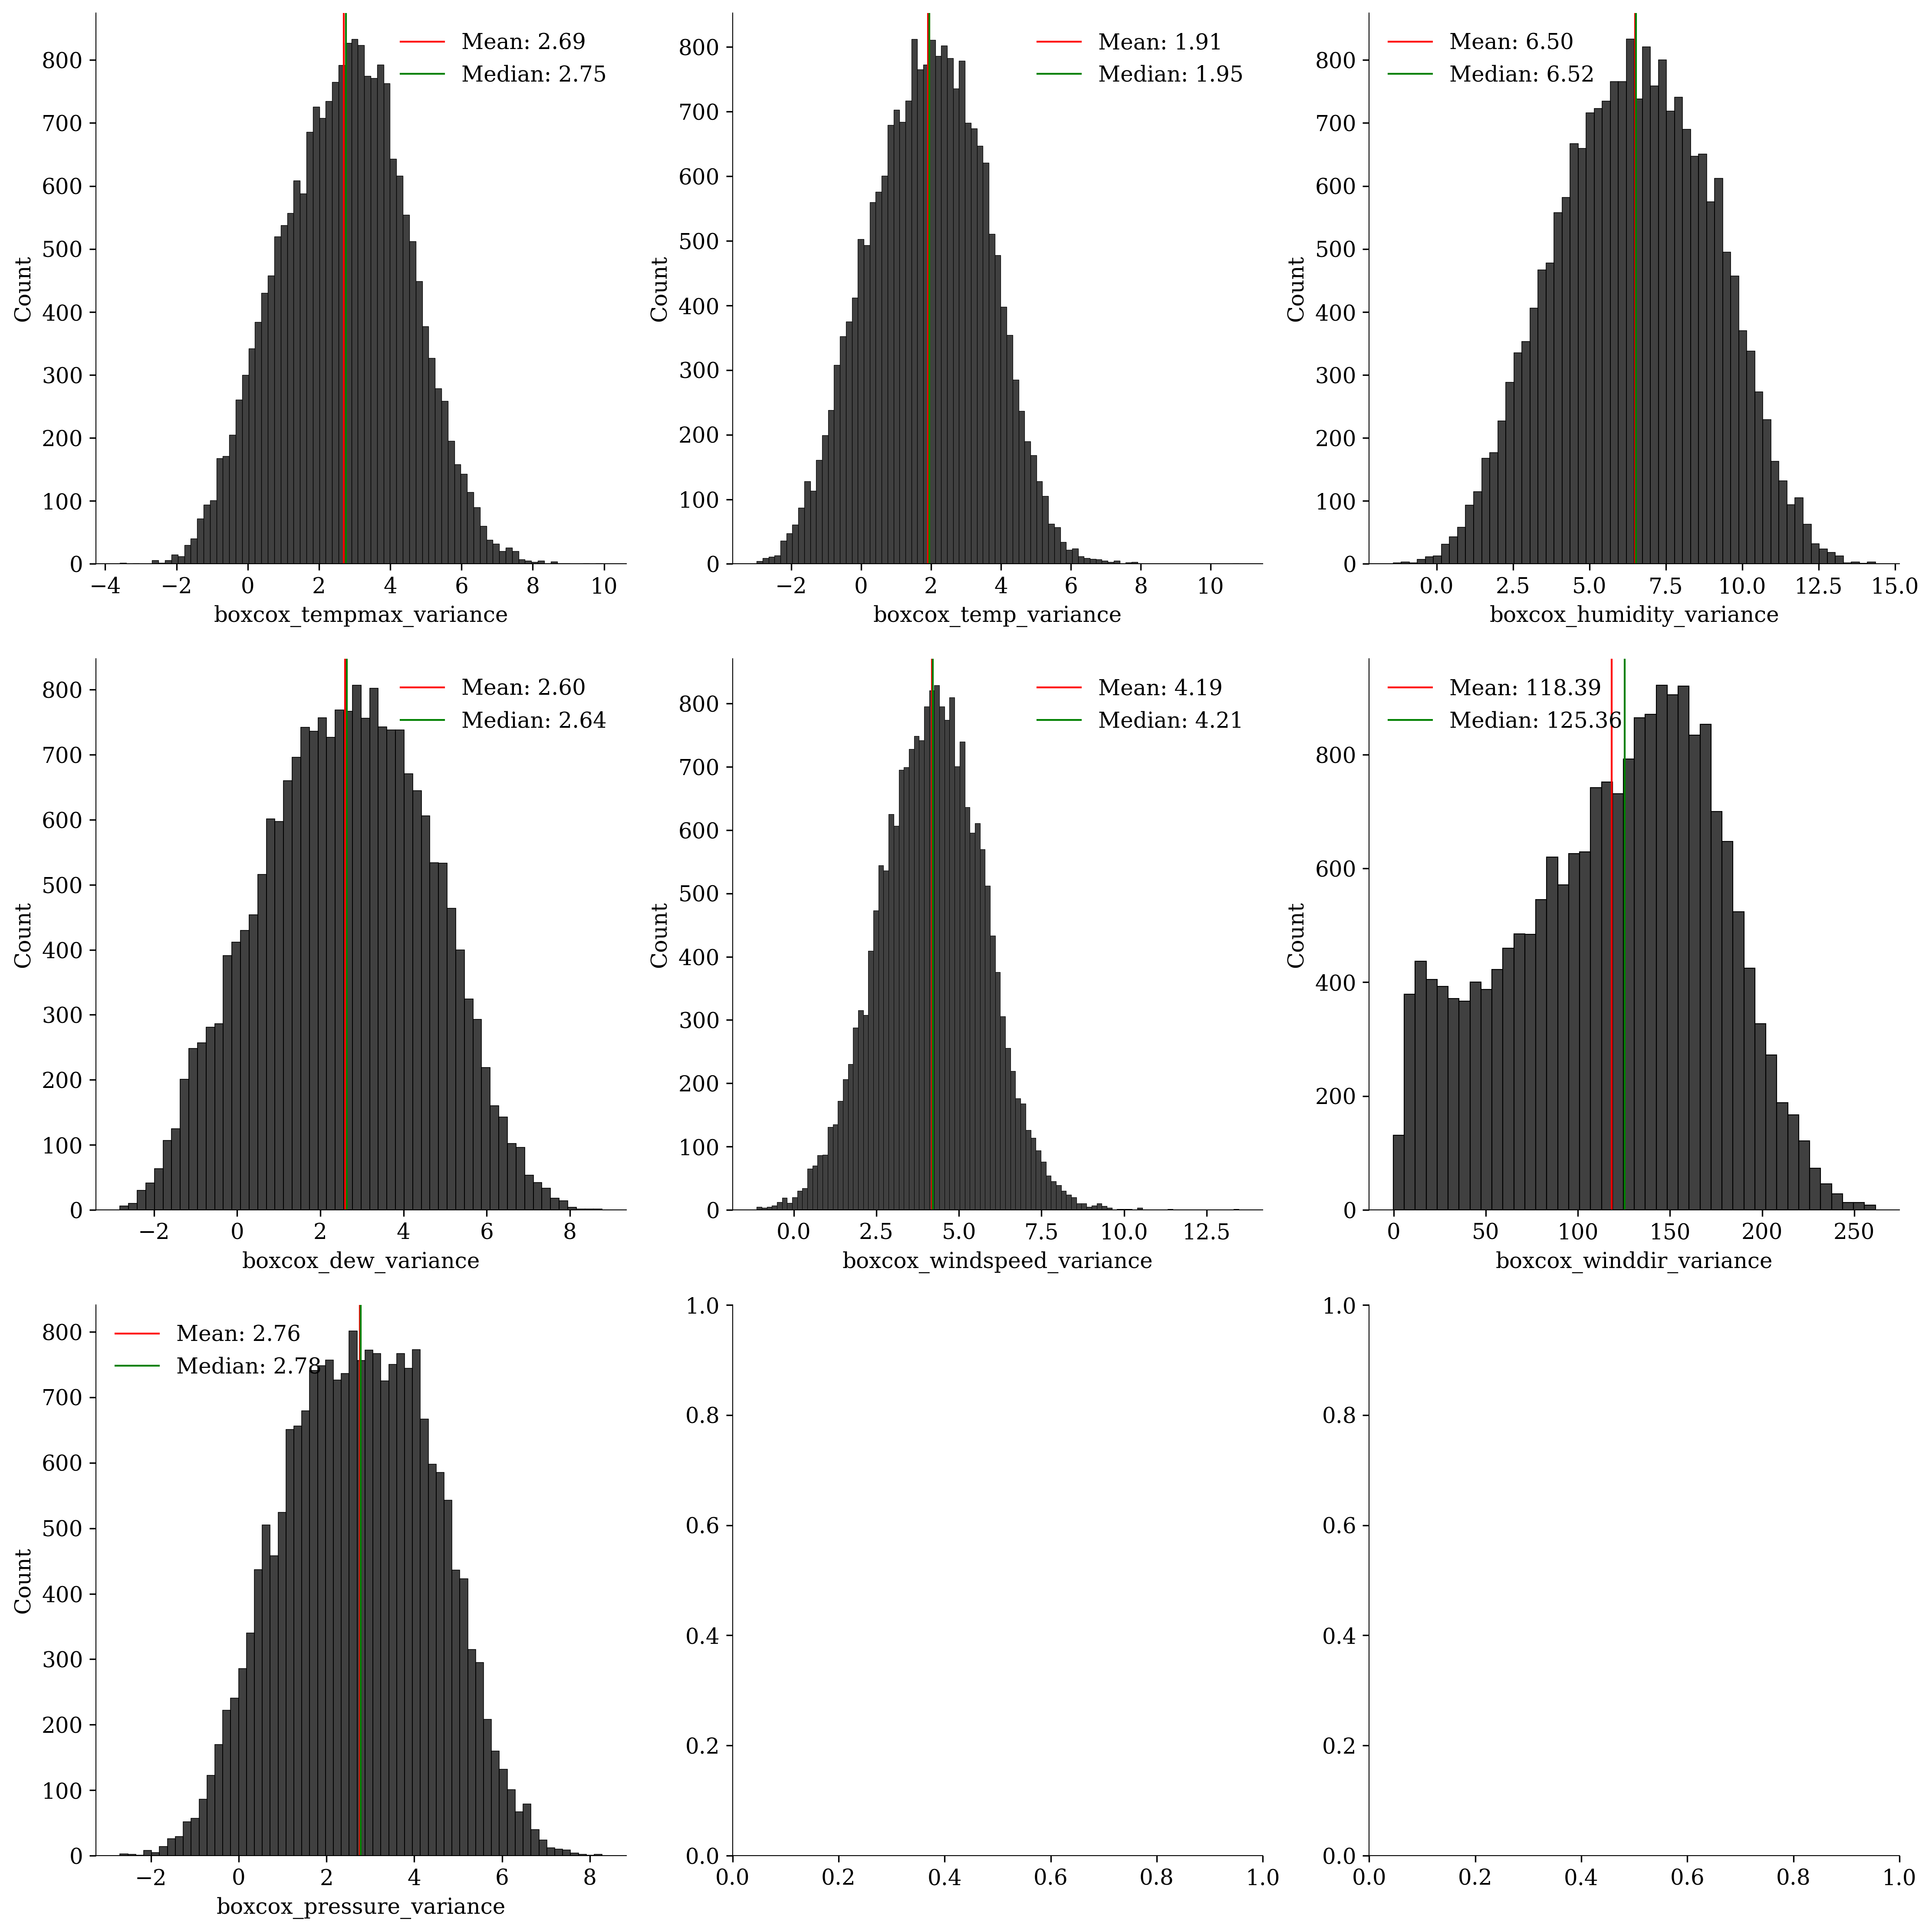

In [89]:
transformed_bc = ['boxcox_' + col for col in boxcox_cols]

utils.HistogramSubplots(numeric_df[transformed_bc])

In [90]:
numeric_df.drop(boxcox_cols, axis=1, inplace=True)

In [91]:
numeric_df.head(2)

FIRE_YEAR  DISCOVERY_DOY  FIRE_SIZE   LATITUDE   LONGITUDE  avg_tempmax  \
0       1992              1        0.1  43.325000 -101.018500     5.257143   
2       1992              1        1.0  33.058333  -79.979167    13.700000   

   avg_temp  avg_humidity  avg_precip   avg_dew  avg_windspeed  avg_winddir  \
0 -2.928571     81.142857    0.000000 -6.071429      18.371429   223.500000   
2  9.885714     81.428571    4.185714  6.671429      23.514286   112.142857   

   avg_pressure           ch4           co2           n2o  precip_variance  \
0   1021.671429  4.613353e-11  3.672947e-09  3.926278e-12         0.000000   
2   1023.357143  1.795242e-11  8.400253e-07  1.743553e-11        55.589796   

   boxcox_tempmax_variance  boxcox_temp_variance  boxcox_humidity_variance  \
0                 2.241465              1.231418                  4.533243   
2                 1.670824             -0.276770                  7.963132   

   boxcox_dew_variance  boxcox_windspeed_variance  boxcox_winddir_variance  \
0             1.996879                   5.249817                70.421101   
2             2.407602                   1.966009               192.632581   

   boxcox_pressure_variance  
0                  4.284964  
2                  3.640714

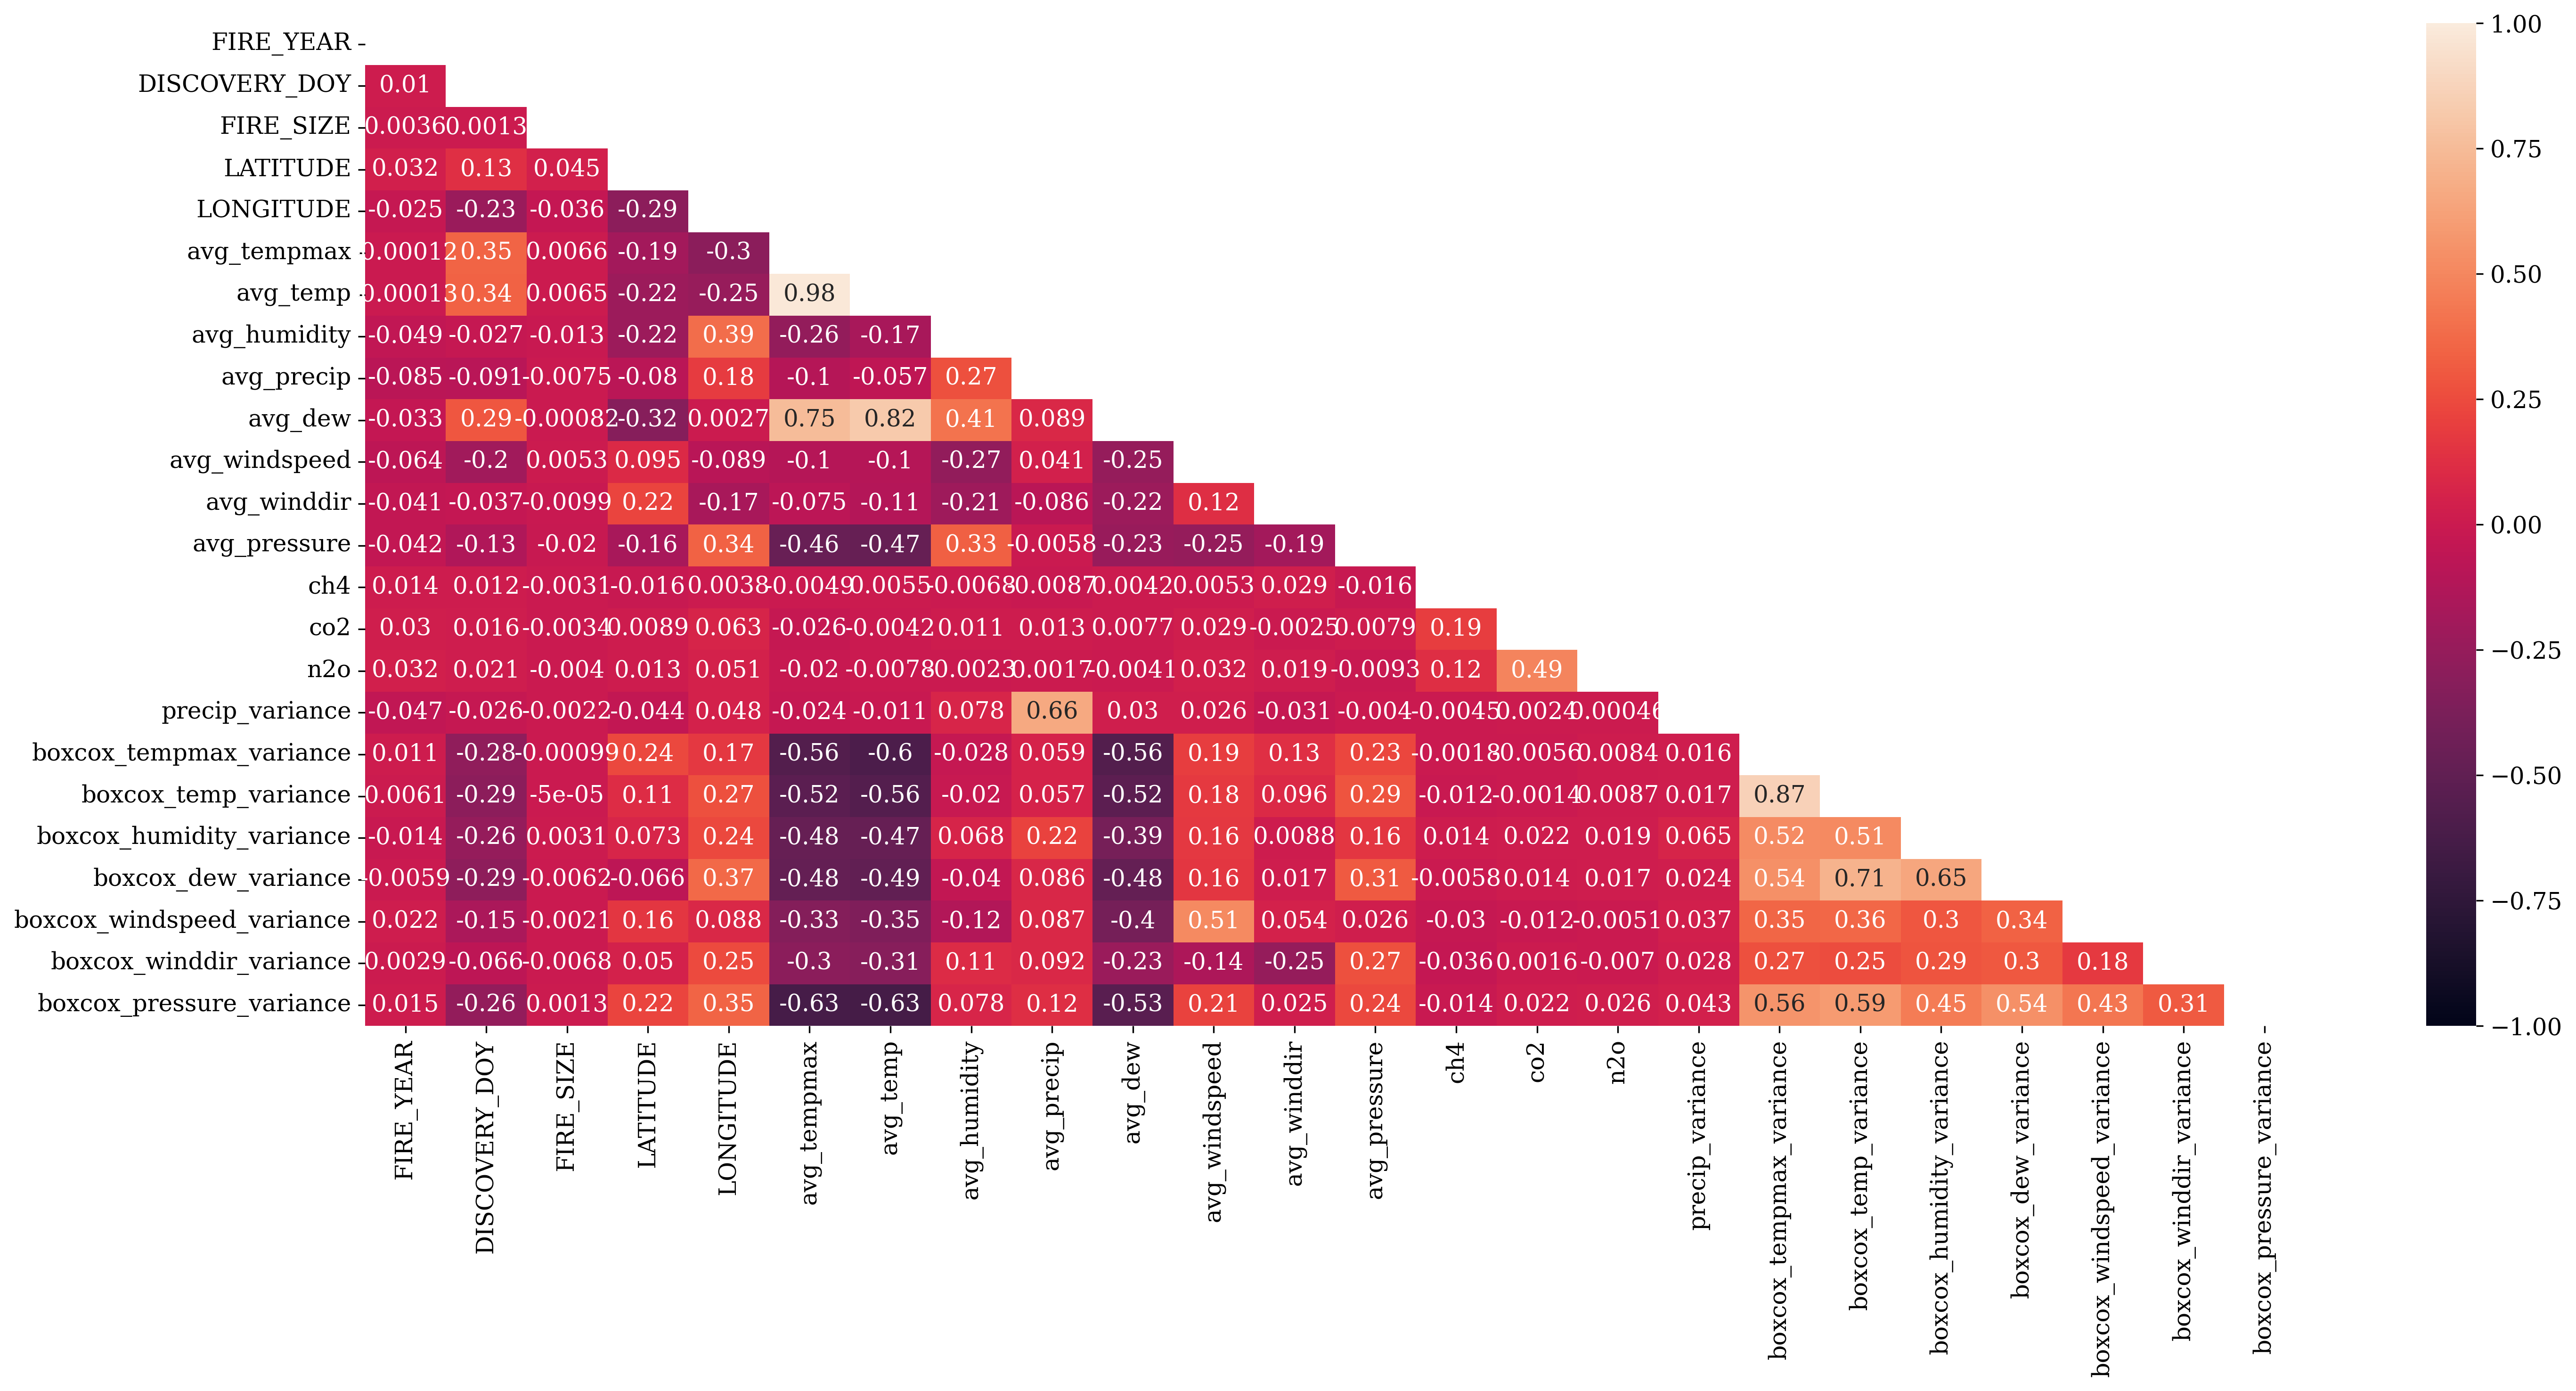

In [147]:
# Plot the correlation using a heatmap
corr = numeric_df.corr()

plt.figure(figsize=(20,10), dpi=300)
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, vmin=-1, vmax=1)
plt.savefig('figs/correlation_matrix.jpg')
plt.show()

### Building Linear Regression

In [148]:
from sklearn.model_selection import train_test_split

X = numeric_df.drop('FIRE_SIZE', axis=1)
y = numeric_df['FIRE_SIZE']

X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_validation, y_train, y_validation = train_test_split(X_rem, y_rem, test_size=0.3)

In [149]:
robust_cols = ['precip_variance', 'ch4', 'n2o', 'co2']
minmax_cols = ['FIRE_YEAR', 'DISCOVERY_DOY', 'LATITUDE', 'LONGITUDE']
ss_cols = [col for col in X_train.columns
           if col not in robust_cols
           if col not in minmax_cols]

In [150]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Create column transformation list
col_transforms = [('standard scale', StandardScaler(), ss_cols),
                  ('minmax scale', MinMaxScaler(), minmax_cols), 
                  ('robust scale', RobustScaler(), robust_cols)]

# Create the column transformer
col_transformer = ColumnTransformer(col_transforms, remainder='passthrough')

# Fit to X_train
col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standard scale', StandardScaler(),
                                 ['avg_tempmax', 'avg_temp', 'avg_humidity',
                                  'avg_precip', 'avg_dew', 'avg_windspeed',
                                  'avg_winddir', 'avg_pressure',
                                  'boxcox_tempmax_variance',
                                  'boxcox_temp_variance',
                                  'boxcox_humidity_variance',
                                  'boxcox_dew_variance',
                                  'boxcox_windspeed_variance',
                                  'boxcox_winddir_variance',
                                  'boxcox_pressure_variance']),
                                ('minmax scale', MinMaxScaler(),
                                 ['FIRE_YEAR', 'DISCOVERY_DOY', 'LATITUDE',
                                  'LONGITUDE']),
                                ('robust scale', Robus

In [151]:
X_train_transformed = col_transformer.transform(X_train)
X_validation_transformed = col_transformer.transform(X_validation)

In [152]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_transformed, y_train)

LinearRegression()

In [153]:
# The intercept
intercept = linreg.intercept_

# The coefficient, notice it returns an array with one spot for each feature
coefficient = linreg.coef_

print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficient}')

Intercept: 70.39504652957135
Coefficients: [-3.43345915e+01  6.29133032e+01  4.47565359e+01 -5.00893628e+01
  6.03324849e+00 -3.97468086e+00 -1.25460234e+02 -6.40546249e+01
 -1.46677914e+02  1.35100834e+02  7.13941566e+01  1.40782169e+01
 -3.99754998e+01 -2.80029435e+01  1.53500252e+01 -2.96233018e+01
 -2.65042313e+02  1.73573298e+03 -7.58472131e+02  8.76207770e-01
 -6.73597287e-01 -7.20479799e-01 -5.15119626e-01]


Now that we have created a model we are able to make some predictions on our validation set.

In [154]:
linreg.score(X_validation_transformed, y_validation)

-0.2614203891112936

In [156]:
numeric_df.head()

FIRE_YEAR  DISCOVERY_DOY  FIRE_SIZE   LATITUDE   LONGITUDE  avg_tempmax  \
0       1992              1       0.10  43.325000 -101.018500     5.257143   
2       1992              1       1.00  33.058333  -79.979167    13.700000   
3       1992              2       0.25  40.775000  -74.854160     6.385714   
5       1992              3       1.91  31.018500  -83.297300    14.457143   
6       1992              3       2.00  30.728900  -87.238100    14.428571   

    avg_temp  avg_humidity  avg_precip   avg_dew  avg_windspeed  avg_winddir  \
0  -2.928571     81.142857    0.000000 -6.071429      18.371429   223.500000   
2   9.885714     81.428571    4.185714  6.671429      23.514286   112.142857   
3   1.585714     67.185714    1.394286 -4.242857      18.157143   133.342857   
5  11.828571     78.957143    4.685714  8.128571      19.200000   160.728571   
6  10.985714     79.971429    0.188571  7.500000      17.000000   216.628571   

   avg_pressure           ch4           co2           n2o  precip_variance  \
0   1021.671429  4.613353e-11  3.672947e-09  3.926278e-12         0.000000   
2   1023.357143  1.795242e-11  8.400253e-07  1.743553e-11        55.589796   
3   1027.400000  3.996876e-11  2.849724e-08  4.053962e-12         9.546510   
5   1019.242857  4.614540e-11  7.060710e-09  2.618501e-12        59.321224   
6   1019.671429  9.516179e-12  3.579336e-09  1.213336e-12         0.213355   

   boxcox_tempmax_variance  boxcox_temp_variance  boxcox_humidity_variance  \
0                 2.241465              1.231418                  4.533243   
2                 1.670824             -0.276770                  7.963132   
3                 1.521625              2.315524                  7.416465   
5                 1.814281              1.621402                  5.914945   
6                 1.169975              1.879018                  5.595259   

   boxcox_dew_variance  boxcox_windspeed_variance  boxcox_winddir_variance  \
0             1.996879                   5.249817                70.421101   
2             2.407602                   1.966009               192.632581   
3             4.046228                   4.703349               197.472098   
5             2.767724                   2.927803               198.521705   
6             2.947874                   4.311854               214.161435   

   boxcox_pressure_variance  
0                  4.284964  
2                  3.640714  
3                  5.925481  
5                  3.828579  
6                  3.091151

In [155]:
categorical_df.head()

tempmax  \
0         [6.7, 6.7, 1.7, 7.2, 8.4, 1.7, 4.4]   
2  [10.8, 11.2, 16.0, 15.9, 13.9, 12.6, 15.5]   
3         [7.8, 8.0, 7.5, 6.4, 2.3, 5.0, 7.7]   
5   [15.1, 15.6, 9.8, 16.0, 13.2, 16.7, 14.8]   
6  [16.9, 12.6, 11.6, 14.9, 14.7, 15.9, 14.4]   

                                         temp  \
0  [-3.0, -4.9, -0.3, -1.4, -3.9, -5.3, -1.7]   
2     [9.6, 10.3, 10.8, 11.0, 8.9, 8.5, 10.1]   
3       [2.3, 1.4, 5.1, 2.7, -2.7, -1.6, 3.9]   
5   [14.1, 13.1, 8.1, 10.3, 10.6, 13.4, 13.2]   
6    [14.8, 10.7, 8.0, 8.3, 12.0, 12.7, 10.4]   

                                     humidity  \
0  [77.0, 78.1, 85.9, 79.3, 74.1, 85.1, 88.5]   
2  [74.6, 94.7, 95.8, 89.3, 74.4, 69.3, 71.9]   
3  [64.4, 65.8, 82.2, 67.6, 49.4, 65.1, 75.8]   
5  [92.0, 79.8, 75.1, 74.0, 70.7, 85.6, 75.5]   
6  [92.5, 81.2, 74.7, 78.2, 73.3, 85.2, 74.7]   

                                  precip  \
0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
2   [4.4, 2.9, 22.0, 0.0, 0.0, 0.0, 0.0]   
3  [0.0, 0.0, 8.93, 0.83, 0.0, 0.0, 0.0]   
5  [21.0, 0.0, 0.0, 0.0, 0.0, 0.5, 11.3]   
6   [1.32, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   

                                          dew  \
0  [-6.9, -8.7, -2.4, -5.0, -8.6, -7.5, -3.4]   
2        [5.1, 9.5, 10.2, 9.3, 4.3, 3.1, 5.2]   
3   [-4.0, -4.8, 2.2, -3.0, -12.2, -7.9, 0.0]   
5       [12.8, 9.5, 3.9, 5.6, 5.4, 11.0, 8.7]   
6       [13.6, 7.6, 3.7, 4.4, 7.3, 10.2, 5.7]   

                                    windspeed  \
0  [13.0, 22.3, 31.7, 20.5, 11.2, 18.7, 11.2]   
2  [22.4, 24.7, 21.9, 23.9, 19.6, 27.7, 24.4]   
3  [25.0, 12.2, 15.5, 29.2, 14.7, 16.1, 14.4]   
5  [16.6, 18.9, 16.3, 24.6, 24.1, 17.1, 16.8]   
6  [20.5, 15.5, 17.7, 11.7, 16.0, 10.4, 27.2]   

                                             winddir  \
0  [295.9, 179.8, 186.4, 218.7, 263.2, 173.2, 247.3]   
2       [43.5, 23.8, 35.0, 281.4, 335.4, 37.3, 28.6]   
3        [316.5, 260.2, 4.8, 2.4, 28.0, 259.6, 61.9]   
5      [71.4, 310.7, 321.8, 48.1, 36.4, 41.7, 295.0]   
6     [347.8, 318.8, 359.2, 42.9, 66.7, 58.0, 323.0]   

                                            pressure  FIRE_SIZE_NUMERIC  \
0  [1026.9, 1029.2, 1017.7, 1012.2, 1019.1, 1024....                  1   
2  [1025.3, 1025.6, 1021.5, 1014.8, 1020.6, 1028....                  2   
3  [1031.2, 1029.6, 1010.7, 1018.4, 1036.6, 1035....                  1   
5  [1018.8, 1016.8, 1021.3, 1024.9, 1024.6, 1017....                  2   
6  [1016.6, 1019.2, 1022.7, 1024.3, 1023.4, 1017....                  2   

   state_AK  state_AL  state_AR  state_AZ  state_CA  state_CO  state_CT  \
0         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
5         0         0         0         0         0         0         0   
6         0         0         0         0         0         0         0   

   state_DC  state_DE  state_FL  state_GA  state_HI  state_IA  state_ID  \
0         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
5         0         0         0         1         0         0         0   
6         0         0         1         0         0         0         0   

   state_IL  state_IN  state_KS  state_KY  state_LA  state_MA  state_MD  \
0         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
5         0         0         0         0         0         0         0   
6         0         0         0         0         0         0         0   

   state_ME  state_MI  state_MN  state_MO  state_MS  state_MT  state_NC  \
0         0         0         0         0         0         0         0   
2      

In [158]:
X = numeric_df.drop('FIRE_SIZE', axis=1)
y = categorical_df['FIRE_SIZE_NUMERIC']

X_rem, X_test,y_rem, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train, X_validatoin, y_train, y_validation = train_test_split(X_rem, y_rem, test_size=0.3, stratify=y_rem)

In [159]:
X_train_transformed = col_transformer.transform(X_train)
X_validation_transformed = col_transformer.transform(X_validation)

In [160]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_transformed, y_train)

LogisticRegression(max_iter=10000)

In [161]:
logreg.score(X_validation_transformed, y_validation)

0.46223021582733814

In [162]:
X_test_transformed =  col_transformer.transform(X_test)

In [163]:
logreg.score(X_test_transformed, y_test)

0.5655718053224646

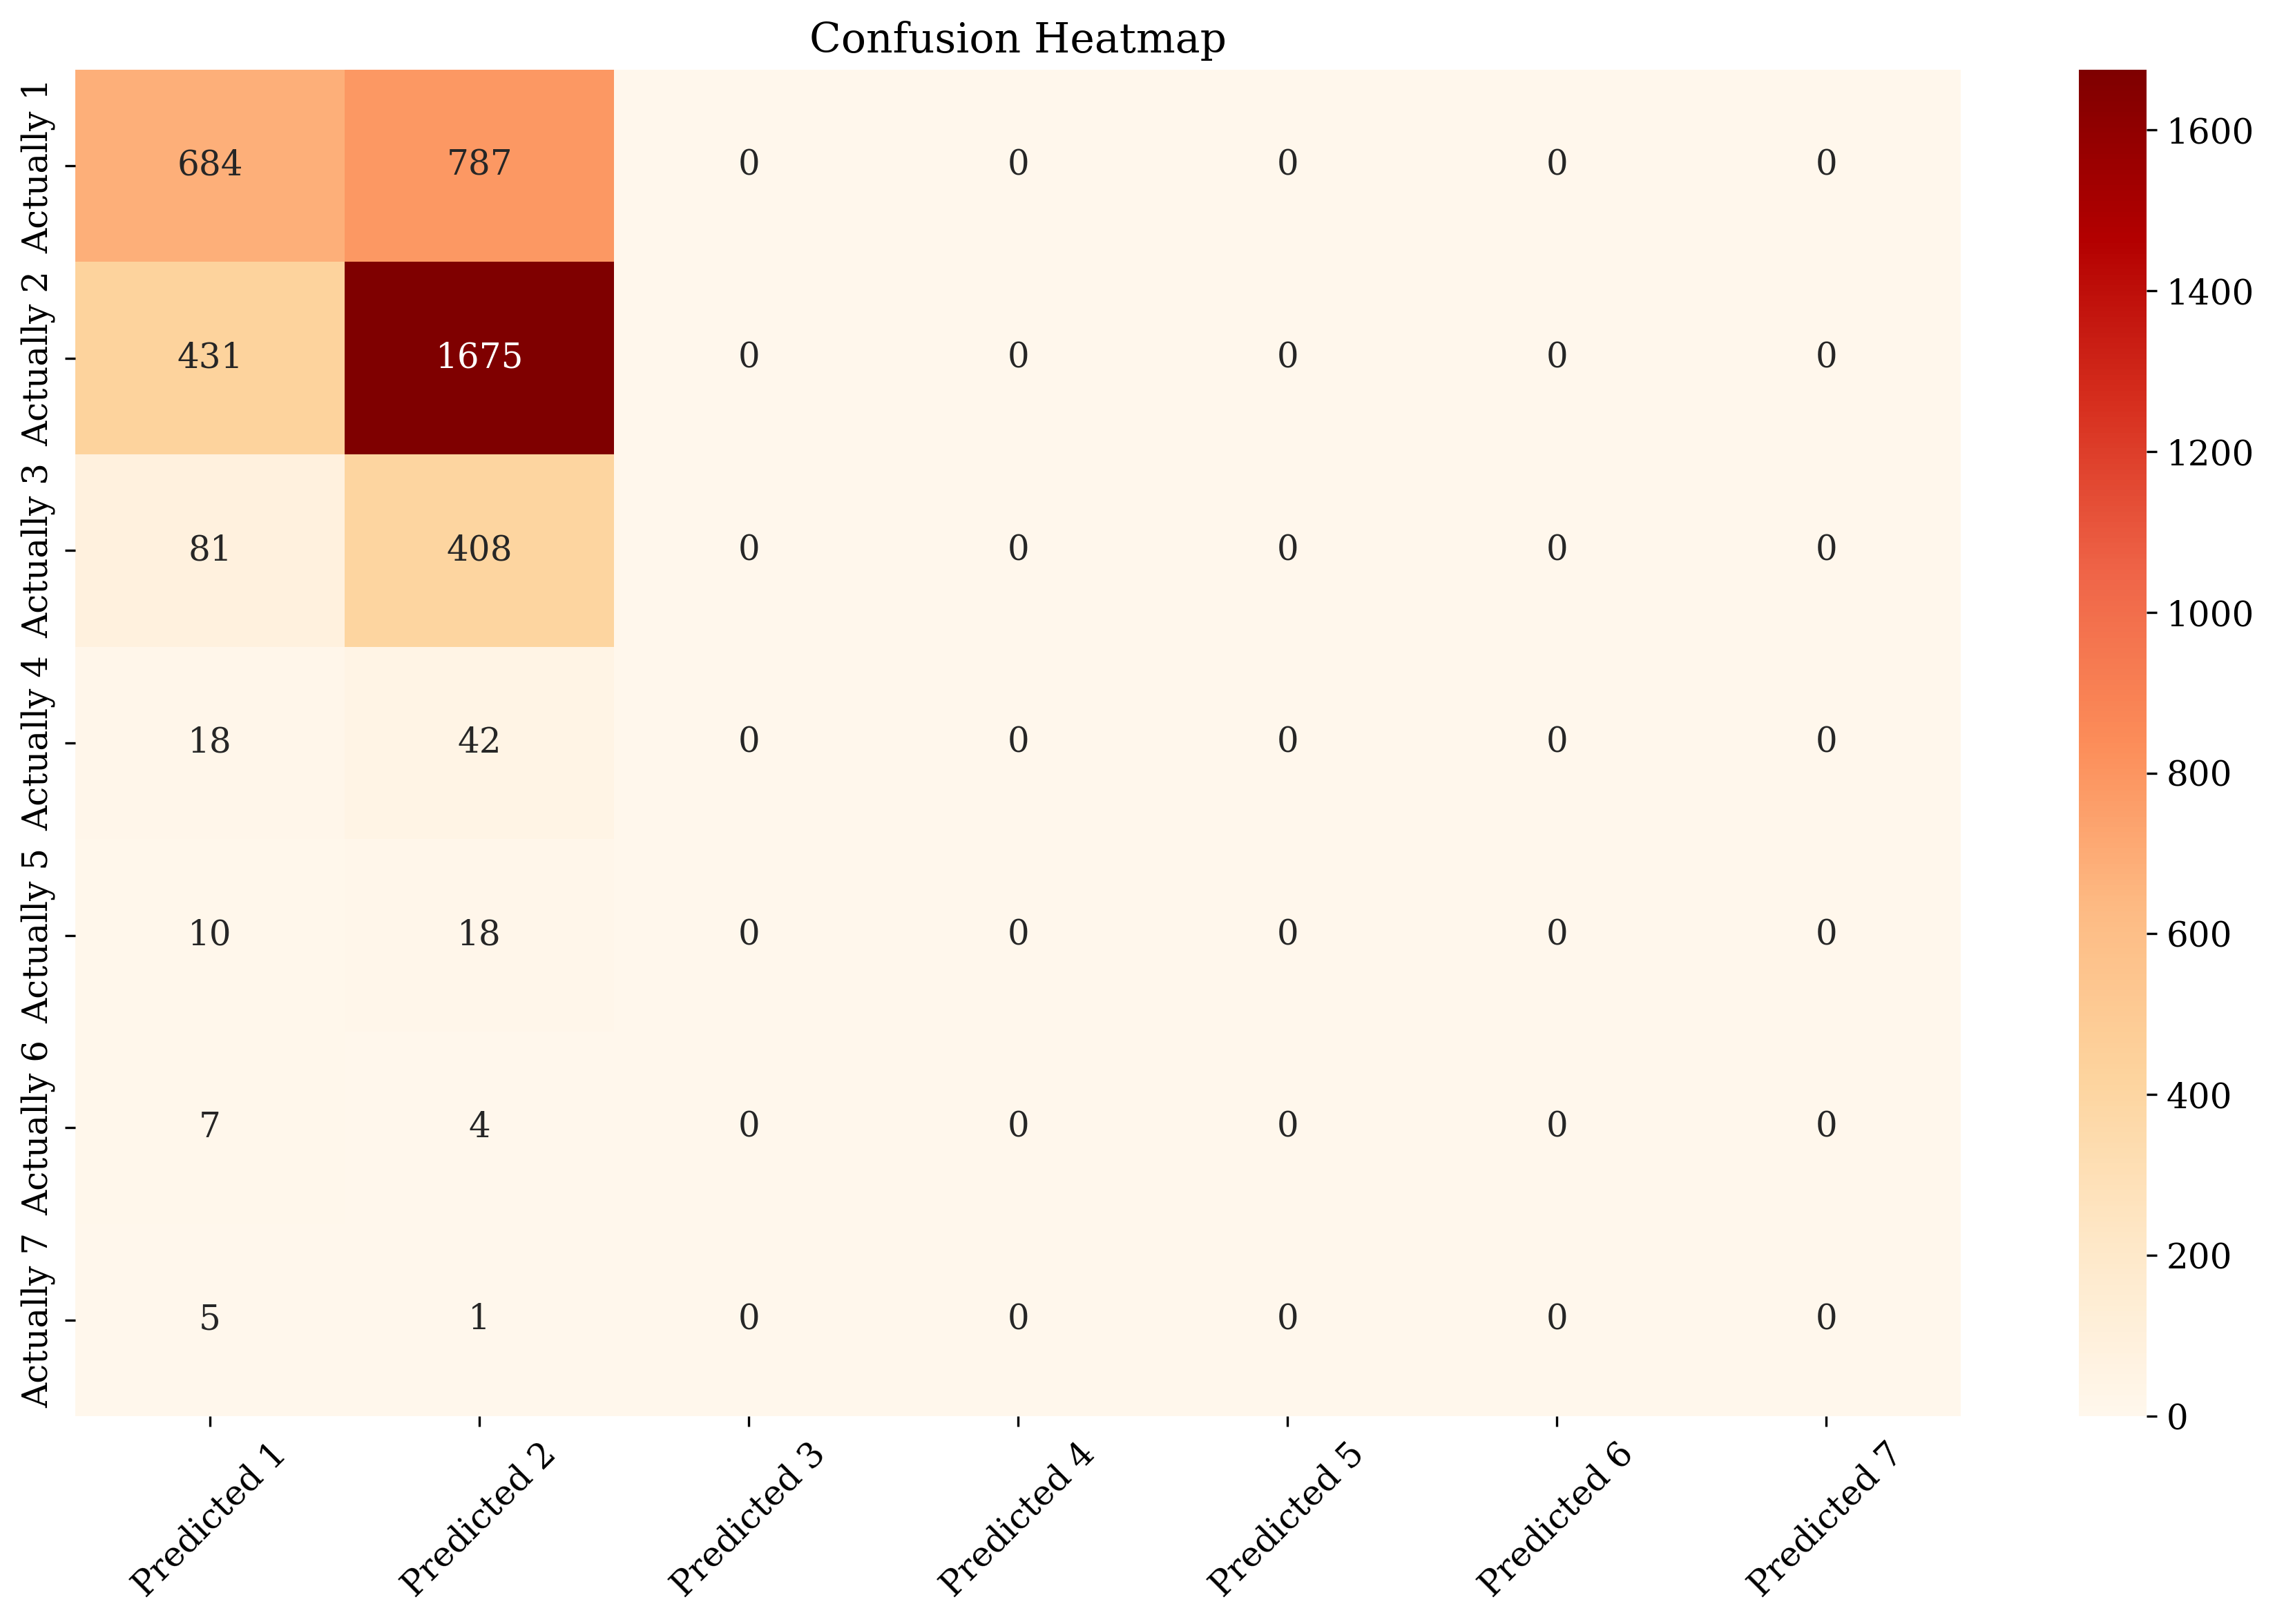

In [164]:
from sklearn.metrics import confusion_matrix

# Make classifications based on the test features, and assign the classifications to a variable
y_pred = logreg.predict(X_test_transformed)

# Build the confusion matrix as a dataframe
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred))
confusion_df.index = [f'Actually {i}' for i in range(1, 8)]
confusion_df.columns = [f'Predicted {i}' for i in range(1, 8)]

# Heatmap of the above
plt.figure(figsize=(12, 8), dpi=300)
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='OrRd') # Passing in fmt='d' prevents the counts from being displayed in scientific notation
plt.xticks(rotation=45)
plt.title('Confusion Heatmap')
plt.savefig('figs/confusion_heatmap_1.jpg')
plt.show()